# **Análise Exploratória dos Atendimentos de Saúde em Curitiba 2025 (trimestres Q1 e Q2)**

### Um Mergulho nos Dados do SUS da Capital Paranaense

Este notebook apresenta uma Análise Exploratória de Dados (EDA) detalhada sobre um conjunto de quase **1 milhão de atendimentos de saúde** realizados na cidade de Curitiba durante o **primeiro semestre de 2025 (trimestres Q1 e Q2)**. O dataset, extraído do sistema e-Saúde da prefeitura, é uma mina de ouro de informações, contendo não apenas dados sobre os atendimentos em si, mas também sobre o perfil demográfico, clínico e, crucialmente, **socioeconômico** dos pacientes.

O objetivo deste trabalho é ir além de uma análise superficial e transformar os dados brutos em **insights estratégicos**, respondendo a perguntas fundamentais para a gestão da saúde pública. Como um cidadão se comporta ao procurar o sistema de saúde? Existem disparidades regionais? As condições de vida influenciam nos resultados de saúde?

### Estrutura da Análise

Nossa exploração foi dividida em seções lógicas para contar uma história completa:

1.  **Limpeza e Preparação dos Dados:** Detalhamento do processo de tratamento de dados nulos, remoção de duplicatas e engenharia de atributos para enriquecer o dataset.
2.  **Análise de Perfil:** Investigação sobre o "quem" e o "quando" dos atendimentos (idade, sexo, turno, dia da semana).
3.  **Análise Geográfica:** Um mapa da demanda, mostrando de onde vêm os pacientes (bairros e municípios vizinhos).
4.  **Análise de Recursos e Fluxo:** Entendendo os desdobramentos de um atendimento (taxas de internação, exames e encaminhamentos).
5.  **Análise Clínica:** Foco nos diagnósticos (CID) mais comuns e nos que levam aos casos mais graves.
6.  **Análise de Interações e Comportamento:** Cruzamento de variáveis para descobrir padrões complexos e testar hipóteses.

### Perguntas que Este Notebook Responde:

Ao longo desta análise, buscamos responder perguntas como:

* Qual o perfil demográfico do paciente que utiliza a rede de saúde de Curitiba?
* A demanda por atendimento nas Unidades Básicas de Saúde (UBS) e nas UPAs segue o mesmo padrão ao longo da semana e do dia?
* Quais bairros e municípios vizinhos mais dependem do sistema de saúde da capital?
* Qual a taxa geral de internação e quais os diagnósticos que mais levam a ela?
* **Insight Principal:** É possível encontrar evidências nos dados de que as condições de moradia e saneamento (Determinantes Sociais da Saúde) estão correlacionadas com os tipos de doenças que levam um paciente à internação?

Convido você a explorar os dados e os insights que descobrimos nesta jornada pela saúde pública de Curitiba!

---

### **Importação das Bibliotecas Essenciais**

In [2]:
# Bibliotecas de Manipulação de Dados
import pandas as pd
import numpy as np

# Bibliotecas de Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas Utilitárias e Auxiliares
import holidays
from datetime import date
import textwrap
from ydata_profiling import ProfileReport # Para o relatório final automático
import warnings

# Configurações de Ambiente e Estilo dos Gráficos
# Garante que os gráficos apareçam no notebook
%matplotlib inline 
# Define um estilo visual bonito para os gráficos
plt.style.use('seaborn-v0_8-whitegrid') 
# Define um tamanho padrão para as figuras, para não precisar repetir toda vez
plt.rcParams['figure.figsize'] = (14, 8) 
plt.rcParams['font.size'] = 12
# Suprime avisos futuros das bibliotecas para deixar a saída mais limpa
warnings.filterwarnings('ignore') 

### **Configurações Visuais e Paleta de Cores do Projeto**

In [4]:
# --- DEFINIÇÃO DA PALETA DE CORES PADRÃO DO PROJETO ---

# Escolhemos uma paleta com tons de azul e verde, que são profissionais e agradáveis.
PALETA_CORES_PROJETO = ['#0d47a1', '#1565c0', '#1976d2', '#1e88e5', '#2196f3', '#42a5f5', '#64b5f6']

# O comando sns.set_palette() define essa como a paleta padrão para a maioria dos gráficos do Seaborn.
sns.set_palette(PALETA_CORES_PROJETO)

print("Paleta de cores padrão do projeto definida com sucesso!")

Paleta de cores padrão do projeto definida com sucesso!


### **Carregamento e Inspeção Inicial do Conjunto de Dados**

In [5]:
caminho_do_arquivo = r'D:\IGOR FIORI\PROGRAMAÇÃO\Projetos Pessoais\E-Saude_Atendimento_Medicos_em_Curitiba\data\2025-06-06_Sistema_E-Saude_Medicos_-_Base_de_Dados.csv'

df_amumc = pd.read_csv(caminho_do_arquivo, sep=';', encoding='latin1')

# Exibir as primeiras linhas do DataFrame
print(f"\n Primeiras 5 linhas do DataFrame:")
display(df_amumc.head())


 Primeiras 5 linhas do DataFrame:


,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
0,01/02/2025 00:10:45,06/10/1993 00:00:00,M,2,UPA,9214097,UPA TATUQUARA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO","ONIBUS,CARRO",CURITIBA,TATUQUARA,Estrangeiro,12099862,1,1,128347
1,01/02/2025 00:20:05,19/12/1997 00:00:00,F,2,UPA,3827836,UPA PINHEIRINHO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO,OUTROS","OUTROS,ONIBUS,CARRO",CURITIBA,PINHEIRINHO,Brasileira,182635,1,1,127612
2,01/02/2025 00:25:08,06/10/1990 00:00:00,F,2,UPA,5323436,UPA CAJURU,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,RADIO,ONIBUS,CURITIBA,CAJURU,Brasileira,2484209,1,1,116606
3,01/02/2025 00:11:35,13/10/1976 00:00:00,M,2,UPA,9214097,UPA TATUQUARA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,OUTROS,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,CAMPO DE SANTANA,Brasileira,3536128,1,1,97106
4,01/02/2025 00:29:48,03/09/2001 00:00:00,F,2,UPA,5323495,UPA CIDADE INDUSTRIAL,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,NOVO MUNDO,Brasileira,9886667,1,1,115423


#### **Geração de Relátorio Autómatico com YDATA-PROFILING (Pré-Limpeza)**

In [ ]:
# Gerar o relatório de perfil do DataFrame
profile = ProfileReport(df_amumc, title="Relatório de Perfil Dataset Atendimento Médicos em Curitiba", explorative=True)

# Salvar o relatório em um arquivo HTML 
profile.to_file("relatorio_perfil_atendimento_medico_Curitiba.html")

### **Verificação dos Tipos de Dados das Colunas**

In [6]:
print(f"Tipos de dados das colunas:")
display(df_amumc.dtypes)

Tipos de dados das colunas:


Data do Atendimento                              object
Data de Nascimento                               object
Sexo                                             object
Código do Tipo de Unidade                         int64
Tipo de Unidade                                  object
Código da Unidade                                 int64
Descrição da Unidade                             object
Código do Procedimento                            int64
Descrição do Procedimento                        object
Código do CBO                                    object
Descrição do CBO                                 object
Código do CID                                    object
Descrição do CID                                 object
Solicitação de Exames                            object
Qtde Prescrita Farmácia Curitibana               object
Qtde Dispensada Farmácia Curitibana               int64
Qtde de Medicamento Não Padronizado              object
Encaminhamento para Atendimento Especialista    

### **Verificação de Valores Ausentes (_Nulos_)**

In [7]:
print(f"\n Valores nulos em cada coluna:")
display(df_amumc.isnull().sum())


 Valores nulos em cada coluna:


Data do Atendimento                                   0
Data de Nascimento                                    0
Sexo                                                  0
Código do Tipo de Unidade                             0
Tipo de Unidade                                       0
Código da Unidade                                     0
Descrição da Unidade                                  0
Código do Procedimento                                0
Descrição do Procedimento                             0
Código do CBO                                         0
Descrição do CBO                                      0
Código do CID                                       299
Descrição do CID                                    299
Solicitação de Exames                                 0
Qtde Prescrita Farmácia Curitibana                    0
Qtde Dispensada Farmácia Curitibana                   0
Qtde de Medicamento Não Padronizado                   0
Encaminhamento para Atendimento Especialista    

### **Verificação e Remoção de Registros Duplicados**

In [8]:
print(f"Dimensões antes da remoção de duplicados: {df_amumc.shape}")

# Remove os duplicados
df_amumc.drop_duplicates(inplace=True)

print(f"Dimensões depois da remoção de duplicados: {df_amumc.shape}")

Dimensões antes da remoção de duplicados: (1218394, 42)
Dimensões depois da remoção de duplicados: (1218390, 42)


## **Limpeza dos Dados**

### **Renomear a Coluna 'Municício' por 'Município'**

In [9]:
df_amumc.rename(columns={'Municício': 'Município'}, inplace=True)

### **Limpeza de Dados - Remoção de Coluna Irrelevante**

Vamos remover a coluna `Área de Atuação`pois ela está mais de _90%_ vazia.

In [10]:
print(f"Dimensões antes: {df_amumc.shape}")
df_amumc.drop(columns=['Área de Atuação'], inplace=True)
print(f"Dimensões depois: {df_amumc.shape}")

Dimensões antes: (1218390, 42)
Dimensões depois: (1218390, 41)


### **Limpeza de Dados - Remoção de Linhas com CID Nulo**

O CID é crucial. Vamos remover os poucos registros onde ele falta.

In [11]:
print(f"Dimensões antes: {df_amumc.shape}")
df_amumc.dropna(subset=['Código do CID', 'Descrição do CID'], inplace=True)
print(f"Dimensões depois: {df_amumc.shape}")

Dimensões antes: (1218390, 41)
Dimensões depois: (1218091, 41)


### **Remoção de Registros com Dados _Socioeconômicos Incompletos_**

Nesta etapa, realizaremos a remoção mais impactante do processo de limpeza. Conforme nossa estratégia, vamos descartar todas as linhas que não possuem o bloco de dados socioeconômicos preenchido.

**Lógica:** Garantir a máxima qualidade e integridade dos dados para as análises de determinantes sociais e modelos preditivos que utilizam essas variáveis. A remoção de aproximadamente 20% do dataset é uma decisão estratégica para priorizar a precisão sobre o volume nesta fase.

In [12]:
# REMOVER LINHAS COM DADOS SOCIOECONÔMICOS INCOMPLETOS

print("Iniciando: Remoção de dados socioeconômicos nulos.")

# Armazenar o número de linhas ANTES da operação para um feedback preciso.
linhas_antes = df_amumc.shape[0]
print(f"Dimensões antes: ({linhas_antes}, {df_amumc.shape[1]})")

# Definir a lista de colunas críticas para a verificação.
colunas_sociais_criticas = [
    'Tratamento no Domicílio', 'Abastecimento', 'Tipo de Habitação',
    'Destino Lixo', 'Fezes/Urina', 'Cômodos', 'Em Caso de Doença'
]

# Executar a remoção das linhas com valores nulos no subconjunto definido.
df_amumc.dropna(subset=colunas_sociais_criticas, inplace=True)

# Calcular e apresentar o feedback quantitativo sobre a operação.
linhas_depois = df_amumc.shape[0]
linhas_removidas = linhas_antes - linhas_depois
percentual_removido = (linhas_removidas / linhas_antes) * 100

print("\nResultado:")
print(f"Linhas removidas: {linhas_removidas}")
print(f"Percentual do dataset removido nesta etapa: {percentual_removido:.2f}%")
print(f"Dimensões depois: ({linhas_depois}, {df_amumc.shape[1]})")

Iniciando: Remoção de dados socioeconômicos nulos.
Dimensões antes: (1218091, 41)

Resultado:
Linhas removidas: 255297
Percentual do dataset removido nesta etapa: 20.96%
Dimensões depois: (962794, 41)


### **Ajustes Finais de Tipos de Dados e Nulos Remanescentes**

Como último passo da preparação, vamos corrigir as colunas de quantidade que foram importadas como texto e preencher os poucos valores ausentes que restaram em colunas categóricas após a limpeza principal.

In [13]:
# Converter colunas de quantidade para tipo numérico
colunas_para_converter = ['Qtde Prescrita Farmácia Curitibana', 'Qtde de Medicamento Não Padronizado']
for col in colunas_para_converter:
    # errors='coerce' transforma o que não for número em Nulo (NaN), que então preenchemos com 0.
    df_amumc[col] = pd.to_numeric(df_amumc[col], errors='coerce').fillna(0).astype(int)
print("-> Colunas de quantidade foram corrigidas para tipo numérico.")

# Preencher nulos restantes em colunas categóricas com o valor mais comum (moda)
colunas_para_preencher = ['Grupo Comunitário', 'Meio de Comunicacao', 'Meio de Transporte']
for col in colunas_para_preencher:
    if col in df_amumc.columns: # Verifica se a coluna ainda existe
        moda = df_amumc[col].mode()[0]
        df_amumc[col].fillna(moda, inplace=True)
print("-> Nulos remanescentes em colunas categóricas foram preenchidos.")

# Verificação final para garantir que não há mais nulos inesperados
print("\nVerificação de nulos após ajustes finais (só devem aparecer os de internação):")
nulos_restantes = df_amumc.isnull().sum()
print(nulos_restantes[nulos_restantes > 0])

-> Colunas de quantidade foram corrigidas para tipo numérico.
-> Nulos remanescentes em colunas categóricas foram preenchidos.

Verificação de nulos após ajustes finais (só devem aparecer os de internação):
Data do Internamento           959488
Estabelecimento Solicitante    959271
Estabelecimento Destino        959271
CID do Internamento            959271
dtype: int64


## **Engenharia de Atributos e Transformações Finais**

Nesta fase, vamos transformar os dados limpos e criar novas colunas (features) que serão essenciais para a análise exploratória.

### **Ajuste dos Tipos de Dados de Data**

O passo mais fundamental antes de qualquer manipulação de datas é garantir que as colunas correspondentes sejam do tipo `datetime`.

In [14]:
print("Iniciando o ajuste de tipos de dados de data...")

# Adicionamos o parâmetro dayfirst=True para indicar o formato Dia/Mês/Ano
df_amumc['Data do Atendimento'] = pd.to_datetime(df_amumc['Data do Atendimento'], dayfirst=True)
df_amumc['Data de Nascimento'] = pd.to_datetime(df_amumc['Data de Nascimento'], dayfirst=True)

# Verificação
print("\nVerificação dos tipos de dados de data:")
print(df_amumc[['Data do Atendimento', 'Data de Nascimento']].dtypes)
print("\nConversão de datas concluída com sucesso!")

Iniciando o ajuste de tipos de dados de data...

Verificação dos tipos de dados de data:
Data do Atendimento    datetime64[ns]
Data de Nascimento     datetime64[ns]
dtype: object

Conversão de datas concluída com sucesso!


### **Transformação da Coluna de Internamento**

Como último passo da limpeza e primeiro da transformação, vamos converter a coluna `Desencadeou Internamento` em uma variável numérica (0 ou 1), que é mais útil para cálculos e modelos.

In [15]:
if 'Desencadeou Internamento' in df_amumc.columns:
    df_amumc['internou'] = df_amumc['Desencadeou Internamento'].apply(lambda x: 1 if x == 'Sim' else 0)
    df_amumc.drop(columns=['Desencadeou Internamento'], inplace=True)
    
    # Verificação
    print("Coluna 'internou' criada com sucesso. Contagem de valores:")
    print(df_amumc['internou'].value_counts())

Coluna 'internou' criada com sucesso. Contagem de valores:
internou
0    959271
1      3523
Name: count, dtype: int64


### **Criação das Colunas de Idade**

Vamos calcular a idade do paciente no momento do atendimento e criar uma classificação etária para facilitar análises segmentadas.

In [16]:
# Cálculo da idade
df_amumc['Idade'] = (df_amumc['Data do Atendimento'] - df_amumc['Data de Nascimento']).dt.days // 365

# Classificação etária com pd.cut 
bins_idade = [-1, 11, 17, 64, 130]
labels_idade = ['Criança', 'Adolescente', 'Adulto', 'Idoso']
df_amumc['Classificação Etária'] = pd.cut(df_amumc['Idade'], bins=bins_idade, labels=labels_idade)

# Verificação
print("Distribuição completa por Classificação Etária:")
print(df_amumc['Classificação Etária'].value_counts())

Distribuição completa por Classificação Etária:
Classificação Etária
Adulto         588939
Idoso          205307
Criança        124654
Adolescente     43894
Name: count, dtype: int64


### **Criação das Colunas de Data e Hora do Atendimento**

Extrair informações como dia da semana, mês, turno e se é fim de semana nos permitirá analisar padrões temporais nos atendimentos.

In [17]:
print("Criando colunas de data/hora...")

# Cria as colunas numéricas e de turno
df_amumc['Dia da Semana'] = df_amumc['Data do Atendimento'].dt.dayofweek # Seg=0, Dom=6
df_amumc['Mês'] = df_amumc['Data do Atendimento'].dt.month
df_amumc['Fim de Semana'] = df_amumc['Dia da Semana'].isin([5, 6])
df_amumc['Hora Atendimento'] = df_amumc['Data do Atendimento'].dt.hour
bins_turno = [-1, 5, 18, 23]
labels_turno = ['Madrugada', 'Dia', 'Noite']
df_amumc['Turno do Atendimento'] = pd.cut(df_amumc['Hora Atendimento'], bins=bins_turno, labels=labels_turno)

# Cria a coluna com o nome do dia da semana em português para usar nos gráficos
mapa_dias = {
    0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira',
    3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'
}
df_amumc['Dia da Semana Nome'] = df_amumc['Dia da Semana'].map(mapa_dias)

# Verificação
print("Colunas de data/hora, incluindo 'Dia da Semana Nome', criadas com sucesso.")
display(df_amumc[['Dia da Semana', 'Dia da Semana Nome']].head())

Criando colunas de data/hora...
Colunas de data/hora, incluindo 'Dia da Semana Nome', criadas com sucesso.


,Dia da Semana,Dia da Semana Nome
0,5,Sábado
1,5,Sábado
2,5,Sábado
3,5,Sábado
4,5,Sábado


### **Criação de Atributos Clínicos (Categorias CID)**

In [18]:
print("Criando colunas de categoria de CID...")

# A primeira letra do Código do CID representa a categoria principal.
df_amumc['Categoria CID'] = df_amumc['Código do CID'].str[0]

# Criamos um "dicionário" para traduzir a letra da categoria para um nome legível.
mapa_cid = {
    'J': 'Doenças do Aparelho Respiratório',
    'I': 'Doenças do Aparelho Circulatório',
    'N': 'Doenças do Aparelho Geniturinário',
    'S': 'Lesões e Traumatismos (Causas Externas)',
    'A': 'Doenças Infecciosas e Parasitárias',
    'B': 'Doenças Infecciosas e Parasitárias',
    'R': 'Sintomas e Sinais Anormais',
    'K': 'Doenças do Aparelho Digestivo',
    'M': 'Doenças do Sistema Osteomuscular',
    'G': 'Doenças do Sistema Nervoso',
    'F': 'Transtornos Mentais e Comportamentais',
    'Z': 'Fatores que Influenciam a Saúde (Exames, etc.)'
}
# Usamos .map() para criar a nova coluna com os nomes das categorias
df_amumc['Nome Categoria CID'] = df_amumc['Categoria CID'].map(mapa_cid).fillna('Outras Categorias')

print("Colunas 'Categoria CID' e 'Nome Categoria CID' criadas com sucesso.")
display(df_amumc[['Código do CID', 'Categoria CID', 'Nome Categoria CID']].head())

Criando colunas de categoria de CID...
Colunas 'Categoria CID' e 'Nome Categoria CID' criadas com sucesso.


,Código do CID,Categoria CID,Nome Categoria CID
0,S936,S,Lesões e Traumatismos (Causas Externas)
1,N23,N,Doenças do Aparelho Geniturinário
2,G43,G,Doenças do Sistema Nervoso
3,B01,B,Doenças Infecciosas e Parasitárias
4,M752,M,Doenças do Sistema Osteomuscular


### **Otimização Final da Memória**

Como boa prática final, vamos converter colunas de texto com poucos valores repetidos para o tipo `category`. Isso reduz drasticamente o uso de memória e pode acelerar futuras operações.

In [19]:
for col in df_amumc.select_dtypes(include=['object']).columns:
    if df_amumc[col].nunique() < 200:
        df_amumc[col] = df_amumc[col].astype('category')

print("-> Colunas de texto com baixa cardinalidade foram otimizadas.")

-> Colunas de texto com baixa cardinalidade foram otimizadas.


### **Verificação Final da Fase de Transformação**

In [20]:
print("--- ENGENHARIA DE ATRIBUTOS CONCLUÍDA ---")
print("\nVerificação final dos tipos de dados e uso de memória:")
df_amumc.info(memory_usage='deep')

--- ENGENHARIA DE ATRIBUTOS CONCLUÍDA ---

Verificação final dos tipos de dados e uso de memória:
<class 'pandas.core.frame.DataFrame'>
Index: 962794 entries, 0 to 1218393
Data columns (total 51 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   Data do Atendimento                           962794 non-null  datetime64[ns]
 1   Data de Nascimento                            962794 non-null  datetime64[ns]
 2   Sexo                                          962794 non-null  category      
 3   Código do Tipo de Unidade                     962794 non-null  int64         
 4   Tipo de Unidade                               962794 non-null  category      
 5   Código da Unidade                             962794 non-null  int64         
 6   Descrição da Unidade                          962794 non-null  category      
 7   Código do Procedimento                     

### **Geração de Relátorio Autómatico com YDATA-PROFILING (Pós-Limpeza)**


In [ ]:
# Gerar o relatório de perfil do DataFrame
profile = ProfileReport(df_amumc, title="Relatório de Perfil Dataset Atendimento Médicos em Curitiba", explorative=True)

# Salvar o relatório em um arquivo HTML 
profile.to_file("relatorio_perfil_pos_limpeza_atendimento_medico_Curitiba.html")

## **Análise Exploratória de Dados (EDA)**

Com o dataset limpo e enriquecido, iniciamos a fase de análise exploratória. O objetivo é usar sumarizações estatísticas e visualizações para entender os padrões e as principais características dos atendimentos de saúde em Curitiba.

### Análise de Estatísticas Descritivas

Vamos começar com uma visão geral das estatísticas descritivas de todas as colunas. Usaremos `df.describe(include='all')` para obter um resumo tanto das colunas numéricas (com média, mediana, desvio padrão, etc.) quanto das colunas categóricas (com contagem de valores únicos, valor mais frequente, etc.).

In [21]:
# O parâmetro include='all' mostra estatísticas para colunas numéricas E de texto/categoria.
estatisticas_completas = df_amumc.describe(include='all')

print("Estatísticas Descritivas Completas do Dataset:")
display(estatisticas_completas)

Estatísticas Descritivas Completas do Dataset:


,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Idade,Classificação Etária,Dia da Semana,Mês,Fim de Semana,Hora Atendimento,Turno do Atendimento,Dia da Semana Nome,Categoria CID,Nome Categoria CID
count,962794,962794,962794,962794.000000,962794,9.627940e+05,962794,9.627940e+05,962794,962794.0,...,962794.000000,962794,962794.000000,962794.000000,962794,962794.000000,962794,962794,962794,962794
unique,NaN,NaN,2,NaN,3,NaN,125,NaN,37,53.0,...,NaN,4,NaN,NaN,2,NaN,3,7,26,12
top,NaN,NaN,F,NaN,BASICO,NaN,UPA SITIO CERCADO,NaN,CONSULTA MEDICA EM ATENCAO PRIMARIA,225125.0,...,NaN,Adulto,NaN,NaN,False,NaN,Dia,Terça-feira,Z,"Fatores que Influenciam a Saúde (Exames, etc.)"
freq,NaN,NaN,606703,NaN,671406,NaN,41706,NaN,551448,265182.0,...,NaN,588939,NaN,NaN,898310,NaN,863140,192180,366345,366345
mean,2025-03-17 16:57:17.964828672,1982-01-02 09:35:09.961632640,NaN,1.331787,NaN,1.995400e+06,NaN,3.140561e+08,NaN,NaN,...,42.731252,NaN,2.170132,3.002147,NaN,12.540657,NaN,NaN,NaN,NaN
min,2025-02-01 00:10:45,1907-12-04 00:00:00,NaN,1.000000,NaN,1.546600e+04,NaN,1.010400e+08,NaN,NaN,...,0.000000,NaN,0.000000,2.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,2025-02-22 16:55:46.500000,1962-09-21 00:00:00,NaN,1.000000,NaN,1.702700e+04,NaN,3.010101e+08,NaN,NaN,...,24.000000,NaN,1.000000,2.000000,NaN,9.000000,NaN,NaN,NaN,NaN
50%,2025-03-18 12:49:40,1980-03-29 00:00:00,NaN,1.000000,NaN,1.744200e+04,NaN,3.010101e+08,NaN,NaN,...,44.000000,NaN,2.000000,3.000000,NaN,12.000000,NaN,NaN,NaN,NaN
75%,2025-04-08 09:11:11,2000-10-26 00:00:00,NaN,2.000000,NaN,3.359646e+06,NaN,3.010600e+08,NaN,NaN,...,62.000000,NaN,3.000000,4.000000,NaN,16.000000,NaN,NaN,NaN,NaN
max,2025-05-01 03:16:18,2025-04-24 00:00:00,NaN,3.000000,NaN,9.381015e+06,NaN,8.020300e+08,NaN,NaN,...,117.000000,NaN,6.000000,5.000000,NaN,23.000000,NaN,NaN,NaN,NaN


### **Análise por Idade**

Como as idades dos pacientes se distribuem? Existem picos em alguma faixa etária específica, como em crianças bem pequenas ou em idosos? Um histograma é a melhor ferramenta para visualizar a forma dessa distribuição.

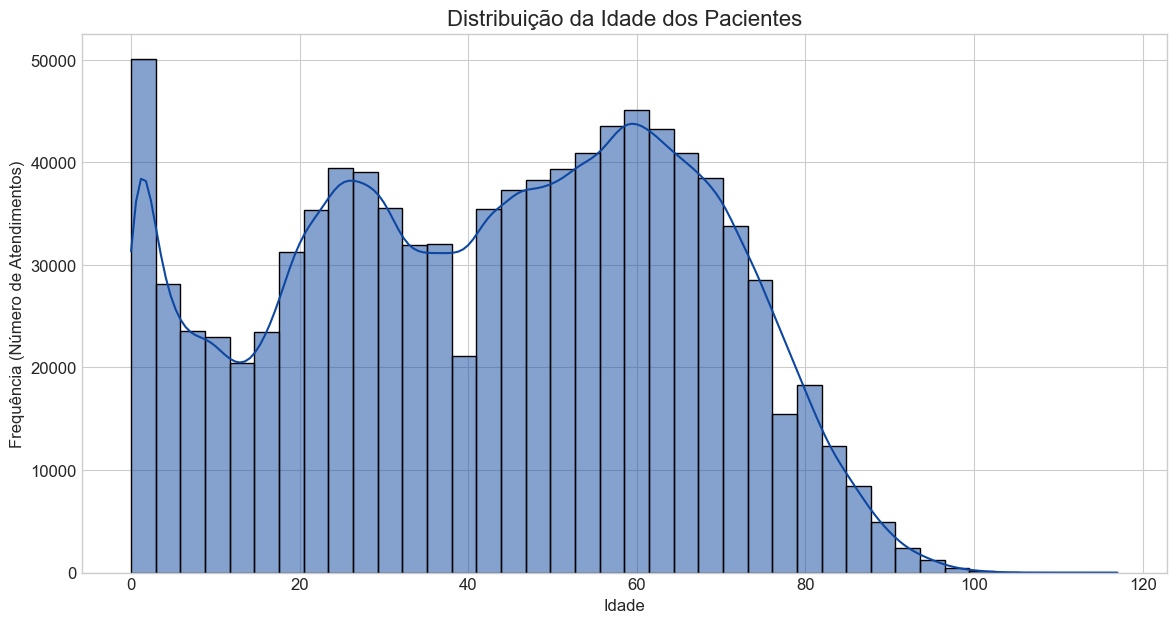

In [22]:
# Definindo o tamanho da figura para ter uma boa visualização
plt.figure(figsize=(14, 7))

# Criando o histograma com o Seaborn
# - 'bins=40' divide as idades em 40 "caixas" para uma boa granularidade.
# - 'kde=True' adiciona uma linha suave (Kernel Density Estimate) para melhor visualizar a forma da distribuição.
sns.histplot(data=df_amumc, x='Idade', bins=40, kde=True)

# Adicionando títulos e rótulos para clareza
plt.title('Distribuição da Idade dos Pacientes', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Frequência (Número de Atendimentos)')

plt.show()

### **Análise por Sexo**

Começamos com a análise demográfica mais básica: qual a distribuição de atendimentos entre os sexos feminino e masculino?

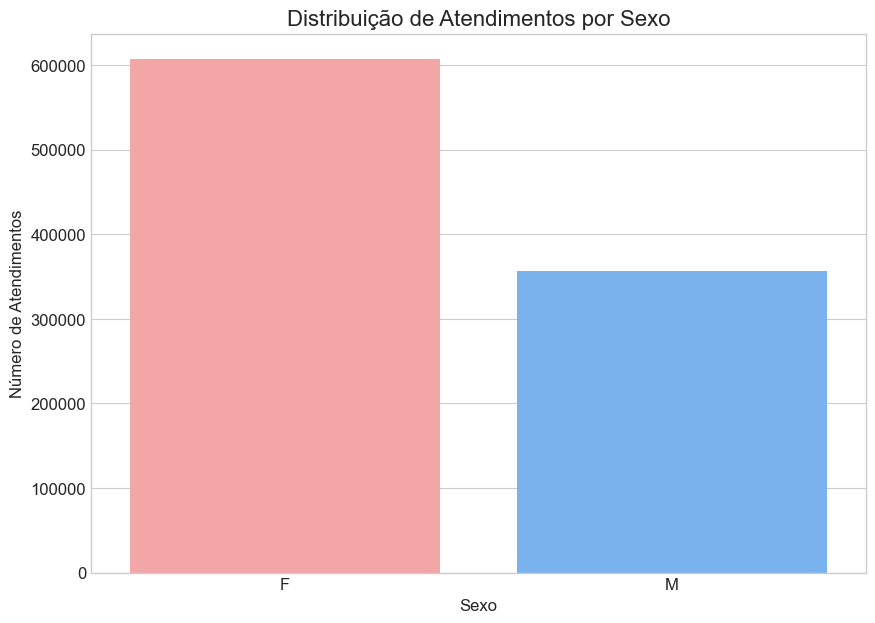

In [23]:
# Definindo o tamanho da figura
plt.figure(figsize=(10, 7))

# Gráfico de barras para a distribuição de atendimentos por sexo
sns.countplot(data=df_amumc, x='Sexo', palette=['#FF9999', '#66B2FF' ], order=df_amumc['Sexo'].value_counts().index)

# Adicionando títulos e rótulos para clareza
plt.title('Distribuição de Atendimentos por Sexo', fontsize=16)
plt.xlabel('Sexo')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=0) # Mantém os rótulos (F, M) na horizontal

plt.show()

### **Análise por Faixa Etária**

Após criar as faixas etárias, podemos visualizar de forma clara qual grupo populacional mais utiliza os serviços de saúde. Um gráfico de barras é ideal para comparar o volume de atendimentos entre essas categorias.

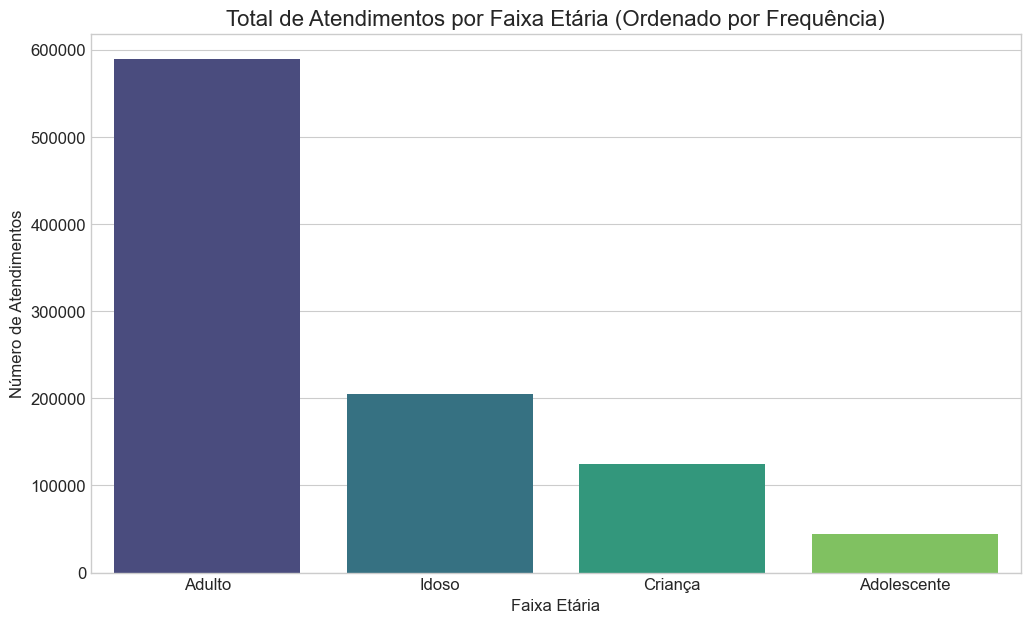

In [24]:
# Definindo o tamanho da figura
plt.figure(figsize=(12, 7))

# 1. Primeiro, calculamos a ordem do maior para o menor usando value_counts().index
ordem_por_frequencia = df_amumc['Classificação Etária'].value_counts().index

# 2. Usamos essa ordem no parâmetro 'order' do countplot
sns.countplot(
    data=df_amumc, 
    x='Classificação Etária', 
    order=ordem_por_frequencia,
    palette='viridis'
)

# Adicionando títulos e rótulos
plt.title('Total de Atendimentos por Faixa Etária (Ordenado por Frequência)', fontsize=16)
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Atendimentos')

plt.show()

### **Análise por Turno de Atendimento**

Em qual período do dia a demanda por atendimentos é maior? A análise por turno é fundamental para o planejamento de escalas e a alocação de recursos nas unidades de saúde.

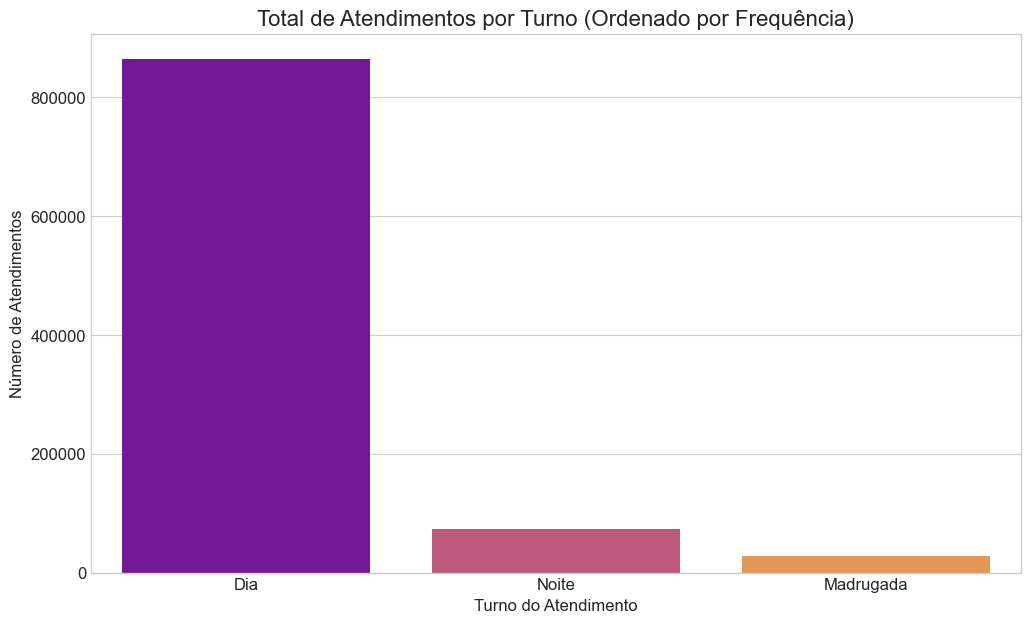

In [25]:
# Definindo o tamanho da figura
plt.figure(figsize=(12, 7))

# 1. Calculamos a ordem do maior para o menor
ordem_por_frequencia_turno = df_amumc['Turno do Atendimento'].value_counts().index

# 2. Usamos essa nova ordem no gráfico
sns.countplot(data=df_amumc, x='Turno do Atendimento',
              order=ordem_por_frequencia_turno, # <-- Usando a ordem de frequência
              palette='plasma')

# Adicionando títulos e rótulos
plt.title('Total de Atendimentos por Turno (Ordenado por Frequência)', fontsize=16)
plt.xlabel('Turno do Atendimento')
plt.ylabel('Número de Atendimentos')

plt.show()

## **Análise Geográfica dos Atendimentos**

Nesta seção, vamos investigar a origem dos pacientes, diferenciando entre moradores de Curitiba e de outras cidades, e identificando os bairros e municípios com maior volume de atendimentos.

### **Proporção: Atendimentos de Residentes de Curitiba vs. Outros Municípios**

Primeiro, vamos entender o quadro geral. Qual o percentual de atendimentos de cidadãos que moram em Curitiba em comparação com os que vêm de fora?

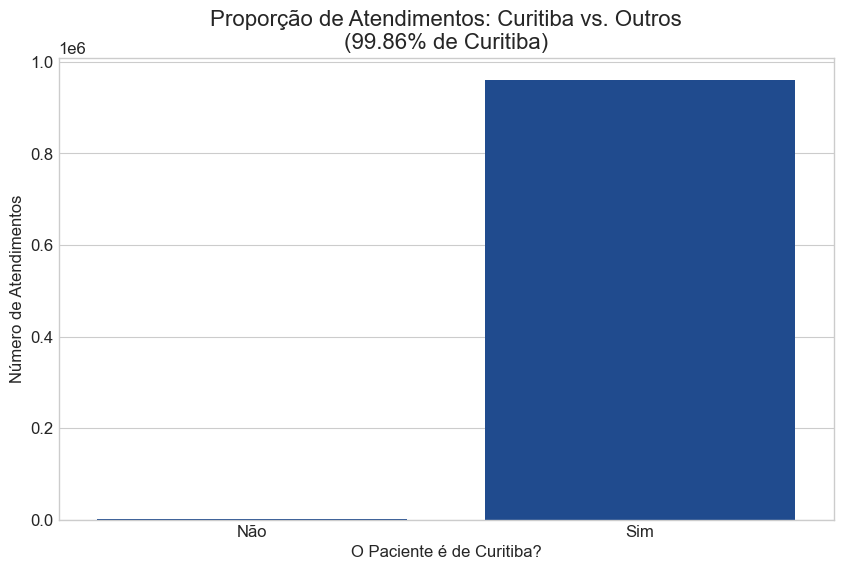

In [26]:
# Para facilitar a análise, criamos uma coluna True/False
df_amumc['É de Curitiba'] = df_amumc['Município'] == 'CURITIBA'

# Calculando o percentual para exibir no título
percentual_curitiba = df_amumc['É de Curitiba'].value_counts(normalize=True).loc[True] * 100

# Criando o gráfico de contagem
plt.figure(figsize=(10, 6))
sns.countplot(data=df_amumc, x='É de Curitiba')

# Adicionando títulos e rótulos
plt.title(f'Proporção de Atendimentos: Curitiba vs. Outros\n({percentual_curitiba:.2f}% de Curitiba)', fontsize=16)
plt.xlabel('O Paciente é de Curitiba?')
plt.ylabel('Número de Atendimentos')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim']) # Renomeia os ticks do eixo x para maior clareza

plt.show()

### **Top 10 Municípios de Origem (Não Residentes)**

Após identificar que uma parcela dos atendimentos é de pacientes não residentes, vamos agora detalhar quais são os principais municípios de origem desses pacientes. Esta análise é importante para entender o fluxo de pessoas na Região Metropolitana e a demanda externa sobre o sistema de saúde da capital.

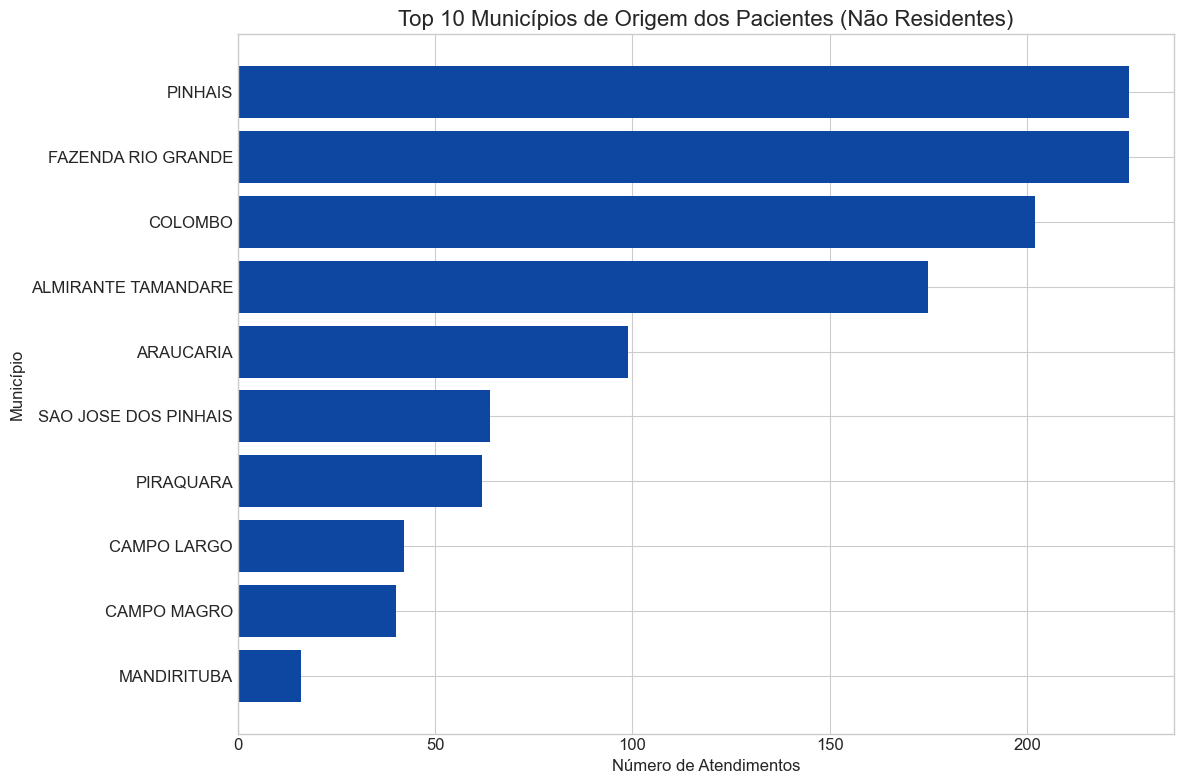

In [27]:
# Filtra apenas pacientes que NÃO são de Curitiba
df_nao_residentes = df_amumc[df_amumc['É de Curitiba'] == False].copy()

# Conta os 10 municípios de origem mais frequentes
top_10_municipios = df_nao_residentes['Município'].value_counts().nlargest(10)

plt.figure(figsize=(12, 8))

# Usando o comando de plotagem mais fundamental do matplotlib
plt.barh(top_10_municipios.index, top_10_municipios.values)

# Adicionando títulos e rótulos
plt.title('Top 10 Municípios de Origem dos Pacientes (Não Residentes)', fontsize=16)
plt.xlabel('Número de Atendimentos')
plt.ylabel('Município')
plt.gca().invert_yaxis() # Inverte o eixo Y para mostrar o maior no topo
plt.tight_layout()

plt.show()

### **Top 15 Bairros de Curitiba com Mais Atendimentos**

Agora, focando nos residentes de Curitiba, vamos identificar os bairros com o maior volume de atendimentos. Isso ajuda a mapear as áreas de maior demanda dentro da própria cidade, o que é essencial para o planejamento da distribuição de recursos entre as unidades de saúde.

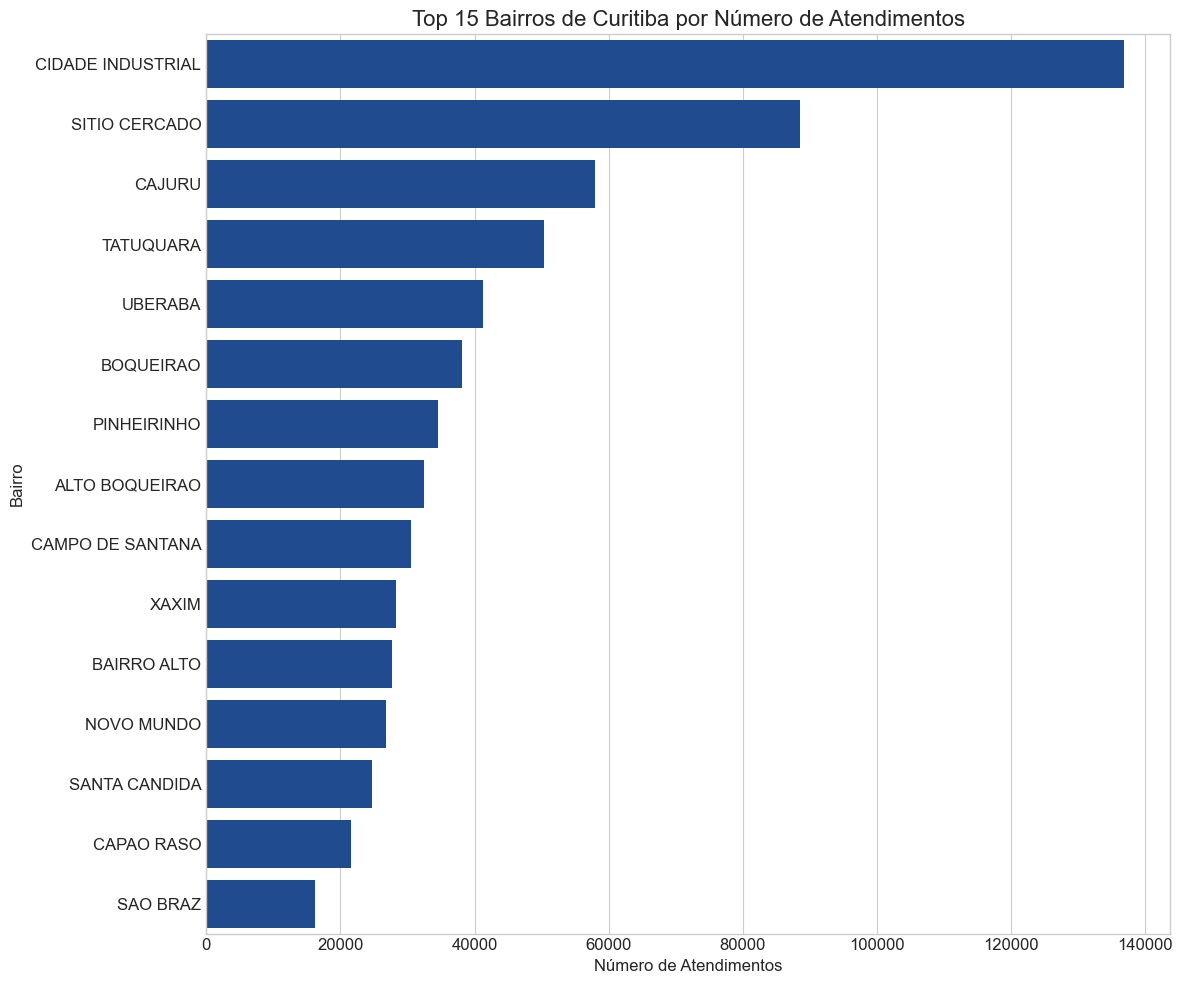

In [28]:
# Filtrar o DataFrame para conter apenas os residentes de Curitiba.
df_residentes = df_amumc[df_amumc['É de Curitiba'] == True].copy()

# Calcular a contagem de atendimentos para os 15 bairros mais frequentes.
top_15_bairros = df_residentes['Bairro'].value_counts().nlargest(15)

# Criar o gráfico de barras horizontal.
plt.figure(figsize=(12, 10))
sns.barplot(y=top_15_bairros.index, x=top_15_bairros.values, orient='h')

# Adicionando títulos e rótulos
plt.title('Top 15 Bairros de Curitiba por Número de Atendimentos', fontsize=16)
plt.xlabel('Número de Atendimentos')
plt.ylabel('Bairro')
plt.tight_layout()

plt.show()

## **Análise de Recursos e Fluxo dos Atendimentos**

Nesta seção, vamos investigar os desdobramentos dos atendimentos: quais ações eles geram (internações, exames, encaminhamentos) e como esses eventos se comportam ao longo do tempo.

### **Proporção de Atendimentos que Geram Internação**

Este é um indicador chave de performance (KPI) para qualquer sistema de saúde. Ele nos mostra qual a "taxa de conversão" de um atendimento geral para um evento de alta complexidade e custo, como uma internação.

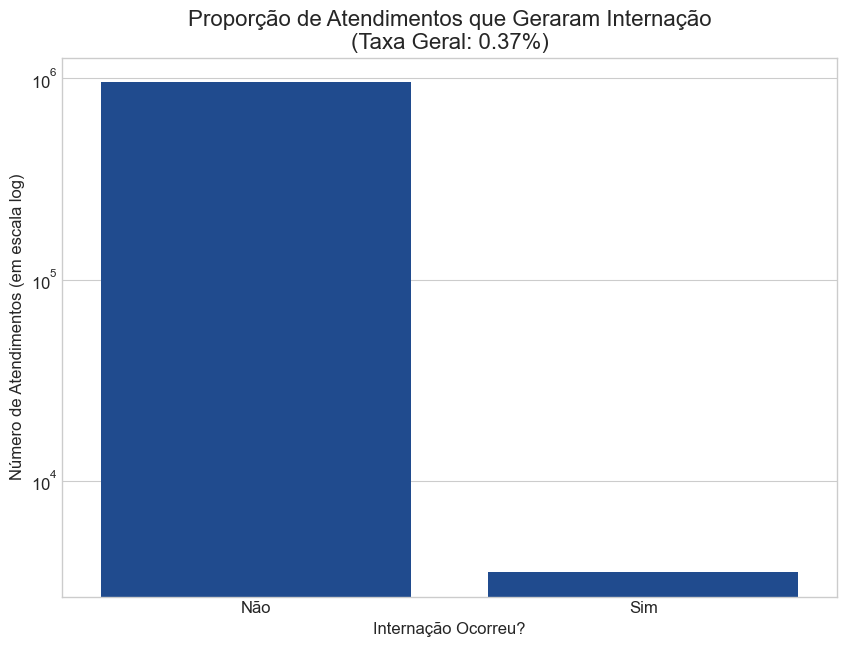

In [29]:
# Definindo o tamanho da figura
plt.figure(figsize=(10, 7))

# Usando a coluna 'internou' que criamos (0 para Não, 1 para Sim)
sns.countplot(data=df_amumc, x='internou')

# Calculando o percentual para o título
taxa_internacao = df_amumc['internou'].mean() * 100

# Adicionando títulos e rótulos
plt.title(f'Proporção de Atendimentos que Geraram Internação\n(Taxa Geral: {taxa_internacao:.2f}%)', fontsize=16)
plt.xlabel('Internação Ocorreu?')
plt.ylabel('Número de Atendimentos (em escala log)')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])

# Usando escala logarítmica no eixo Y para melhor visualização,
# já que a diferença entre "Não" e "Sim" é muito grande.
plt.yscale('log')

plt.show()

### **Análise de Solicitação de Exames e Encaminhamentos**

Esta análise nos ajuda a entender a complexidade dos casos que chegam nas unidades de saúde. Um alto volume de exames ou encaminhamentos pode indicar a necessidade de mais equipamentos de diagnóstico ou de mais especialistas na rede para absorver essa demanda.

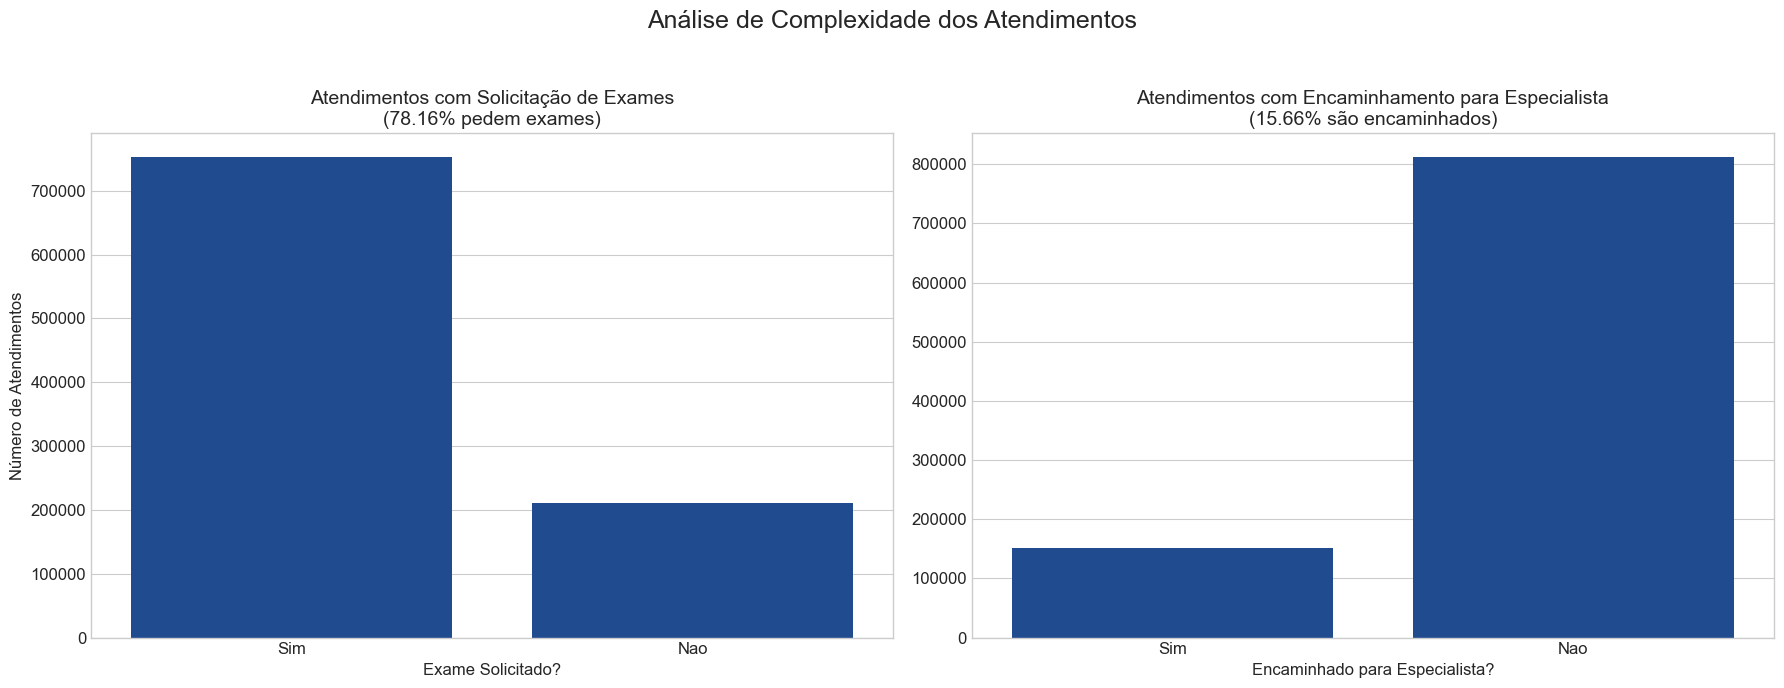

In [30]:
# Configurando a figura para ter 2 gráficos, lado a lado
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Análise de Complexidade dos Atendimentos', fontsize=18)


# --- Gráfico 1: Solicitação de Exames ---
# Calculando o percentual para o título
taxa_exames = df_amumc['Solicitação de Exames'].value_counts(normalize=True).loc['Sim'] * 100

# Criando o gráfico
sns.countplot(ax=axes[0], data=df_amumc, x='Solicitação de Exames', order=['Sim', 'Nao'])
axes[0].set_title(f'Atendimentos com Solicitação de Exames\n({taxa_exames:.2f}% pedem exames)', fontsize=14)
axes[0].set_xlabel('Exame Solicitado?')
axes[0].set_ylabel('Número de Atendimentos')


# --- Gráfico 2: Encaminhamento para Especialista ---
# Calculando o percentual para o título
taxa_encaminhamento = df_amumc['Encaminhamento para Atendimento Especialista'].value_counts(normalize=True).loc['Sim'] * 100

# Criando o gráfico
sns.countplot(ax=axes[1], data=df_amumc, x='Encaminhamento para Atendimento Especialista', order=['Sim', 'Nao'])
axes[1].set_title(f'Atendimentos com Encaminhamento para Especialista\n({taxa_encaminhamento:.2f}% são encaminhados)', fontsize=14)
axes[1].set_xlabel('Encaminhado para Especialista?')
axes[1].set_ylabel('') # Oculta o rótulo para não poluir


plt.tight_layout(rect=[0, 0, 1, 0.95]) # Ajusta o layout para o super-título
plt.show()

## **Evolução Diária de Atendimentos e Internações**

Esta é a nossa primeira análise de série temporal, fundamental para identificar padrões diários, ciclos semanais e tendências gerais. Vamos plotar o número total de atendimentos e o número de internações no mesmo gráfico para comparar suas flutuações e entender a dinâmica da demanda e da severidade ao longo do tempo.

### **Preparação dos Dados para a Série Temporal**

In [31]:
# --- PREPARAÇÃO DOS DADOS PARA A SÉRIE TEMPORAL ---

# Agrupamos os dados por dia, contando o total de atendimentos e somando o total de internações.
# Usar .resample('D') é a melhor prática para séries temporais, pois garante que todos os dias apareçam.
atendimentos_diarios = df_amumc.set_index('Data do Atendimento').resample('D').agg(
    Total_Atendimentos=('internou', 'count'),
    Total_Internacoes=('internou', 'sum')
)

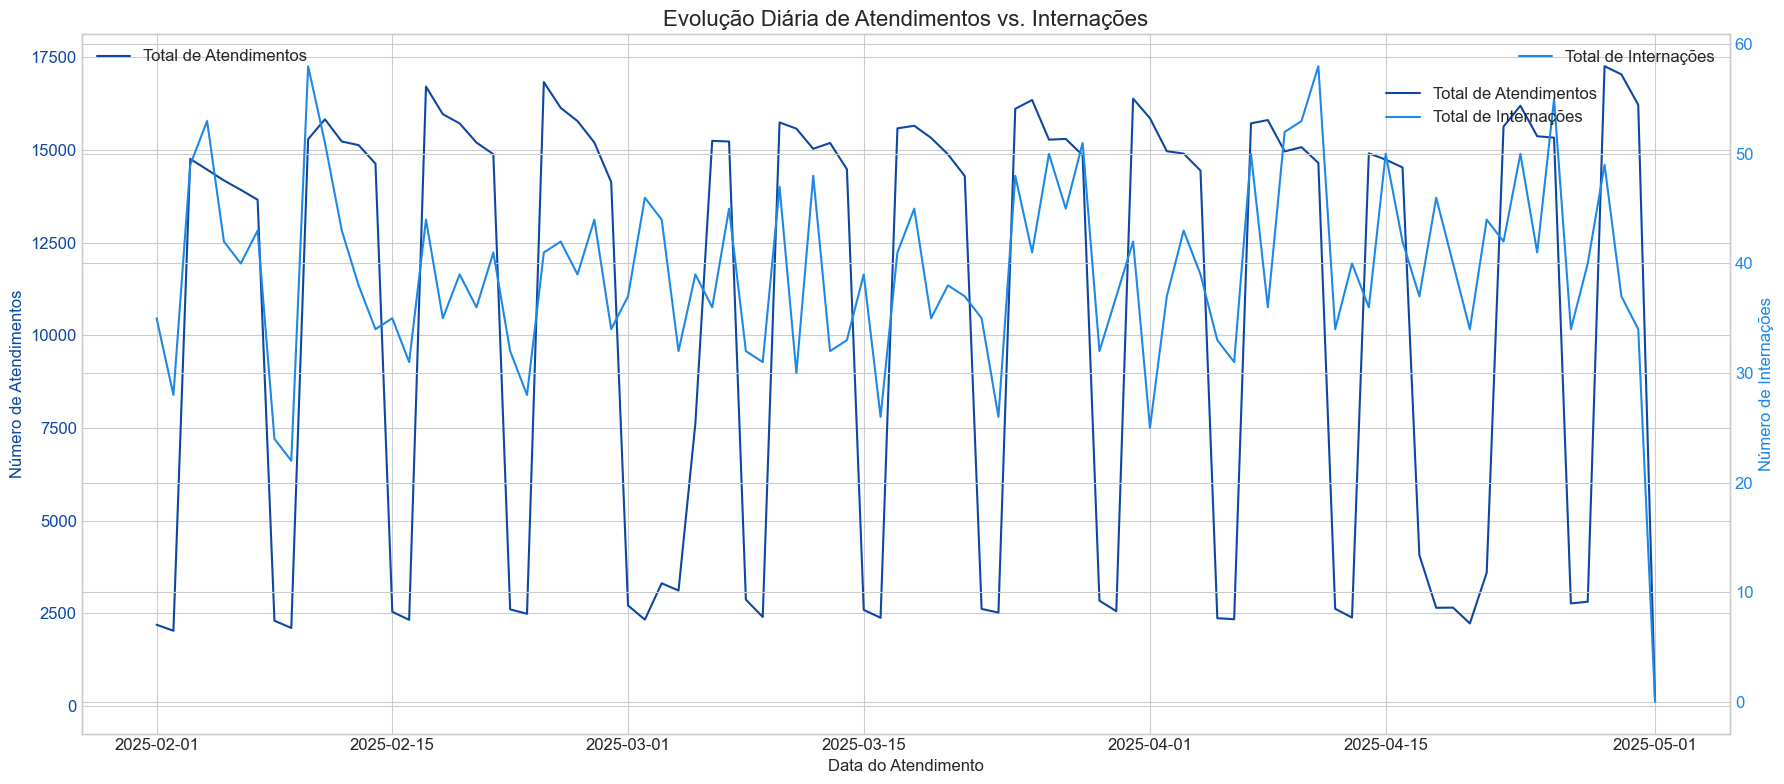

In [32]:
# Criando a figura e o primeiro eixo (para atendimentos)
fig, ax1 = plt.subplots(figsize=(18, 8))

# Plotando a linha do Total de Atendimentos no primeiro eixo
sns.lineplot(data=atendimentos_diarios, x=atendimentos_diarios.index, y='Total_Atendimentos', 
             ax=ax1, color=PALETA_CORES_PROJETO[0], label='Total de Atendimentos')
ax1.set_xlabel('Data do Atendimento')
ax1.set_ylabel('Número de Atendimentos', color=PALETA_CORES_PROJETO[0])
ax1.tick_params(axis='y', labelcolor=PALETA_CORES_PROJETO[0])

# Criando um segundo eixo Y que compartilha o mesmo eixo X (para internações)
ax2 = ax1.twinx()
sns.lineplot(data=atendimentos_diarios, x=atendimentos_diarios.index, y='Total_Internacoes', 
             ax=ax2, color=PALETA_CORES_PROJETO[3], label='Total de Internações')
ax2.set_ylabel('Número de Internações', color=PALETA_CORES_PROJETO[3])
ax2.tick_params(axis='y', labelcolor=PALETA_CORES_PROJETO[3])


# Adicionando título e legenda
plt.title('Evolução Diária de Atendimentos vs. Internações', fontsize=16)
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9)) # Unifica as legendas
plt.show()

## **Análise Clínica por Diagnóstico (CID)**

Nesta seção final da nossa análise exploratória, vamos investigar quais são as doenças e condições mais comuns que levam os pacientes a procurar o sistema de saúde e quais diagnósticos representam os casos mais severos (que resultam em internação).

### **Top 15 Diagnósticos (CIDs) Mais Comuns**

Qual é o principal motivo pelo qual um paciente procura uma unidade de saúde em Curitiba? Este gráfico nos mostra os 15 diagnósticos mais frequentes em todos os atendimentos.

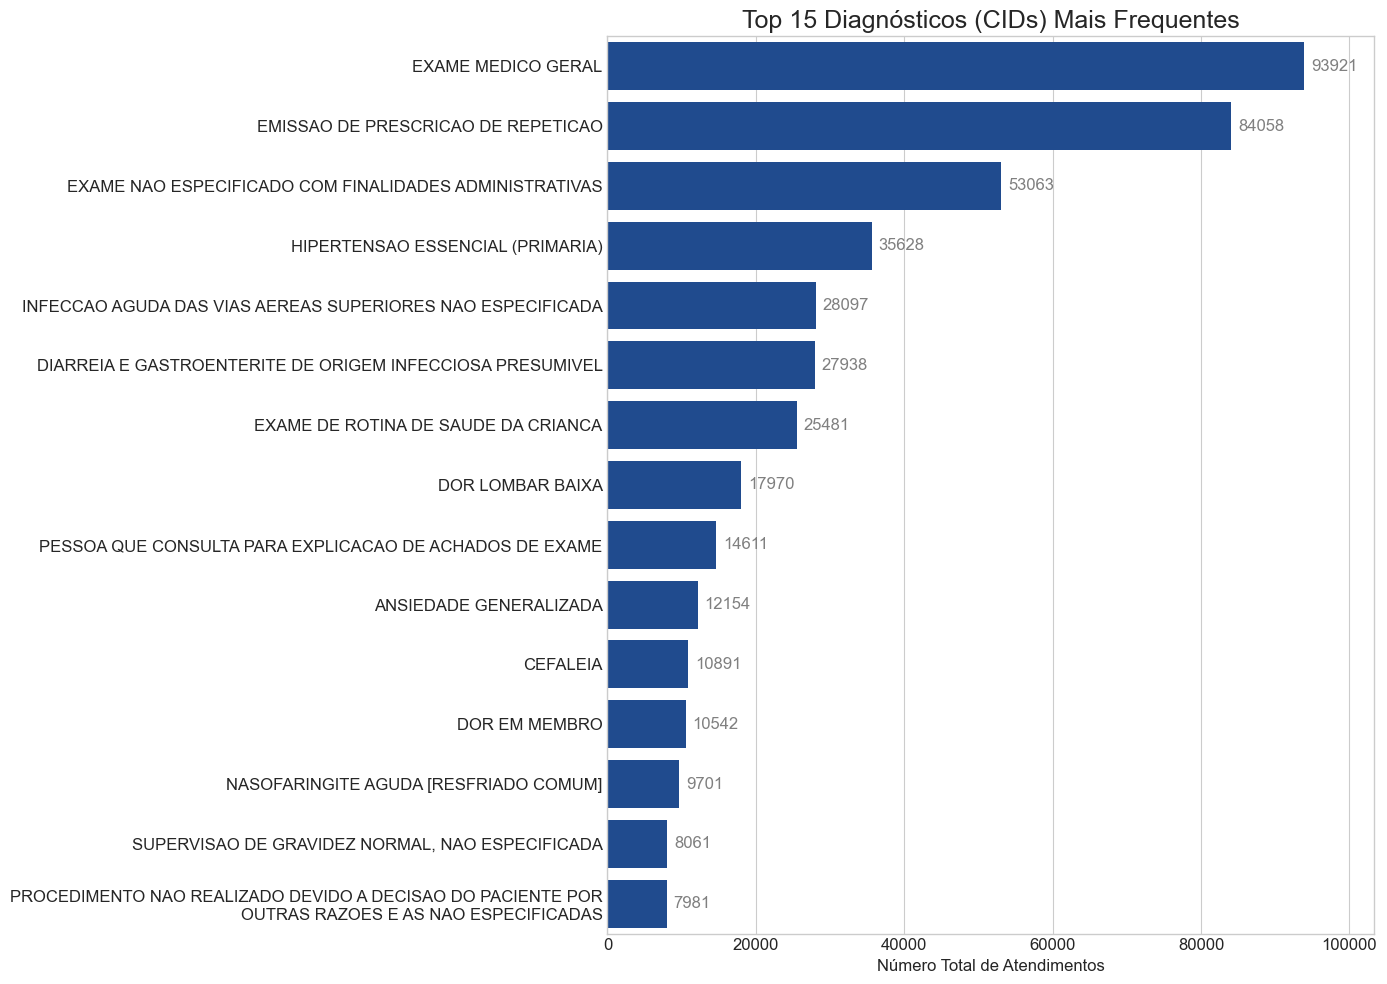

In [33]:
# Calculamos a contagem dos 15 CIDs mais comuns (sem alterações aqui)
top_15_cids_geral = df_amumc['Descrição do CID'].value_counts().nlargest(15)

# --- APRIMORAMENTO 1: Quebra de Linha Automática ---
# Criamos uma nova lista de rótulos, onde cada rótulo longo é quebrado em linhas de no máximo 60 caracteres.
rotulos_formatados = [textwrap.fill(label, width=60) for label in top_15_cids_geral.index]


# --- CRIAÇÃO DO GRÁFICO APRIMORADO ---
plt.figure(figsize=(14, 10))

# Criamos o gráfico de barras horizontal, usando os rótulos formatados no eixo Y
ax = sns.barplot(y=rotulos_formatados, x=top_15_cids_geral.values, orient='h')

# --- Adicionar Rótulos de Dados ---
# Este comando adiciona o valor exato no final de cada barra
ax.bar_label(ax.containers[0], fmt='%.0f', padding=5, fontsize=12, color='gray')


# --- Limpeza Visual ---
plt.title('Top 15 Diagnósticos (CIDs) Mais Frequentes', fontsize=18)
plt.xlabel('Número Total de Atendimentos', fontsize=12)
plt.ylabel('') # Removemos o título do eixo Y, pois é redundante

# Ajusta o limite do eixo X para dar mais espaço para os rótulos das barras
plt.xlim(0, top_15_cids_geral.max() * 1.1) 

plt.tight_layout()
plt.show()

### **Top 15 Diagnósticos (CIDs) que Mais Geram Internações**

Nesta análise, o foco muda de **volume** para **severidade**. Filtramos o dataset para incluir apenas os atendimentos que resultaram em internação (`internou == 1`) e, em seguida, contamos quais são os diagnósticos mais frequentes *dentro deste grupo*. Isso nos mostra quais condições representam a maior carga de trabalho para a rede hospitalar de Curitiba.

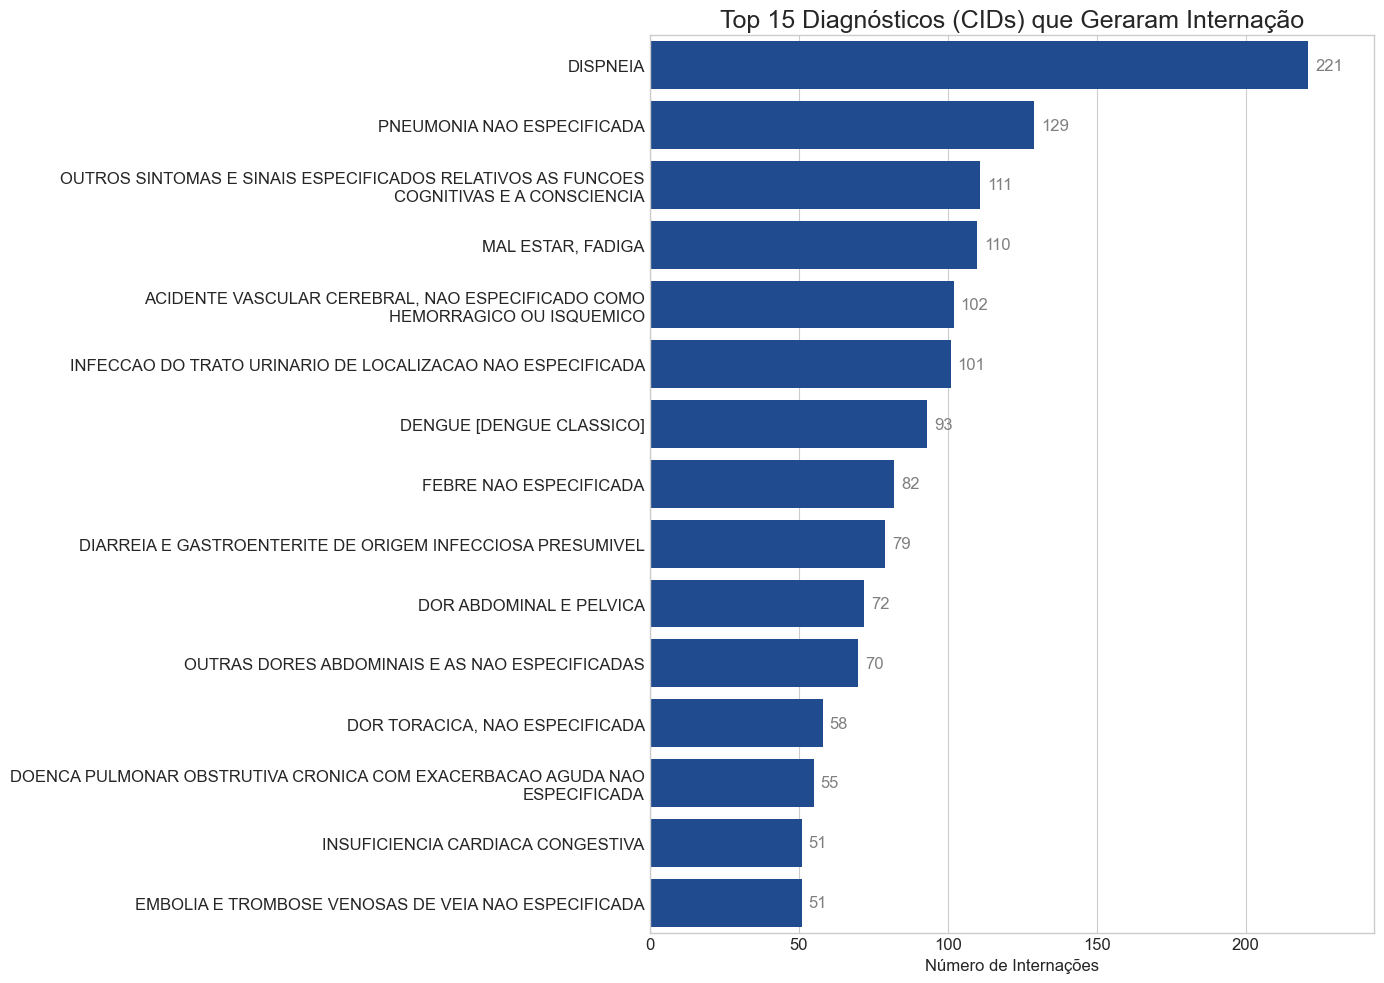

In [34]:
# Filtrar o DataFrame para incluir apenas os casos de internação.
df_internacoes = df_amumc[df_amumc['internou'] == 1].copy()

# Calcular a contagem dos 15 CIDs mais comuns NESTE GRUPO de internações.
top_15_cids_internacao = df_internacoes['Descrição do CID'].value_counts().nlargest(15)

# Formatando os rótulos para quebra de linha
rotulos_formatados_internacao = [textwrap.fill(label, width=60) for label in top_15_cids_internacao.index]


# --- CRIAÇÃO DO GRÁFICO ---
plt.figure(figsize=(14, 10))

# Criando o gráfico de barras horizontal
ax = sns.barplot(y=rotulos_formatados_internacao, x=top_15_cids_internacao.values, orient='h')

# Adicionando os rótulos de dados nas barras
ax.bar_label(ax.containers[0], fmt='%.0f', padding=5, fontsize=12, color='gray')


# --- Títulos e Limpeza Visual ---
plt.title('Top 15 Diagnósticos (CIDs) que Geraram Internação', fontsize=18)
plt.xlabel('Número de Internações')
plt.ylabel('') # Remove o título do eixo Y
plt.xlim(0, top_15_cids_internacao.max() * 1.1)
plt.tight_layout()

plt.show()

### **Análise por Categoria de CID (Capítulos do CID-10)**

Para uma visão mais estratégica, agrupamos os diagnósticos em suas categorias principais (Capítulos do CID-10). Isso nos ajuda a entender quais grandes grupos de doenças são responsáveis pela maior parte das internações, orientando o planejamento de recursos de alta complexidade e políticas de saúde pública.

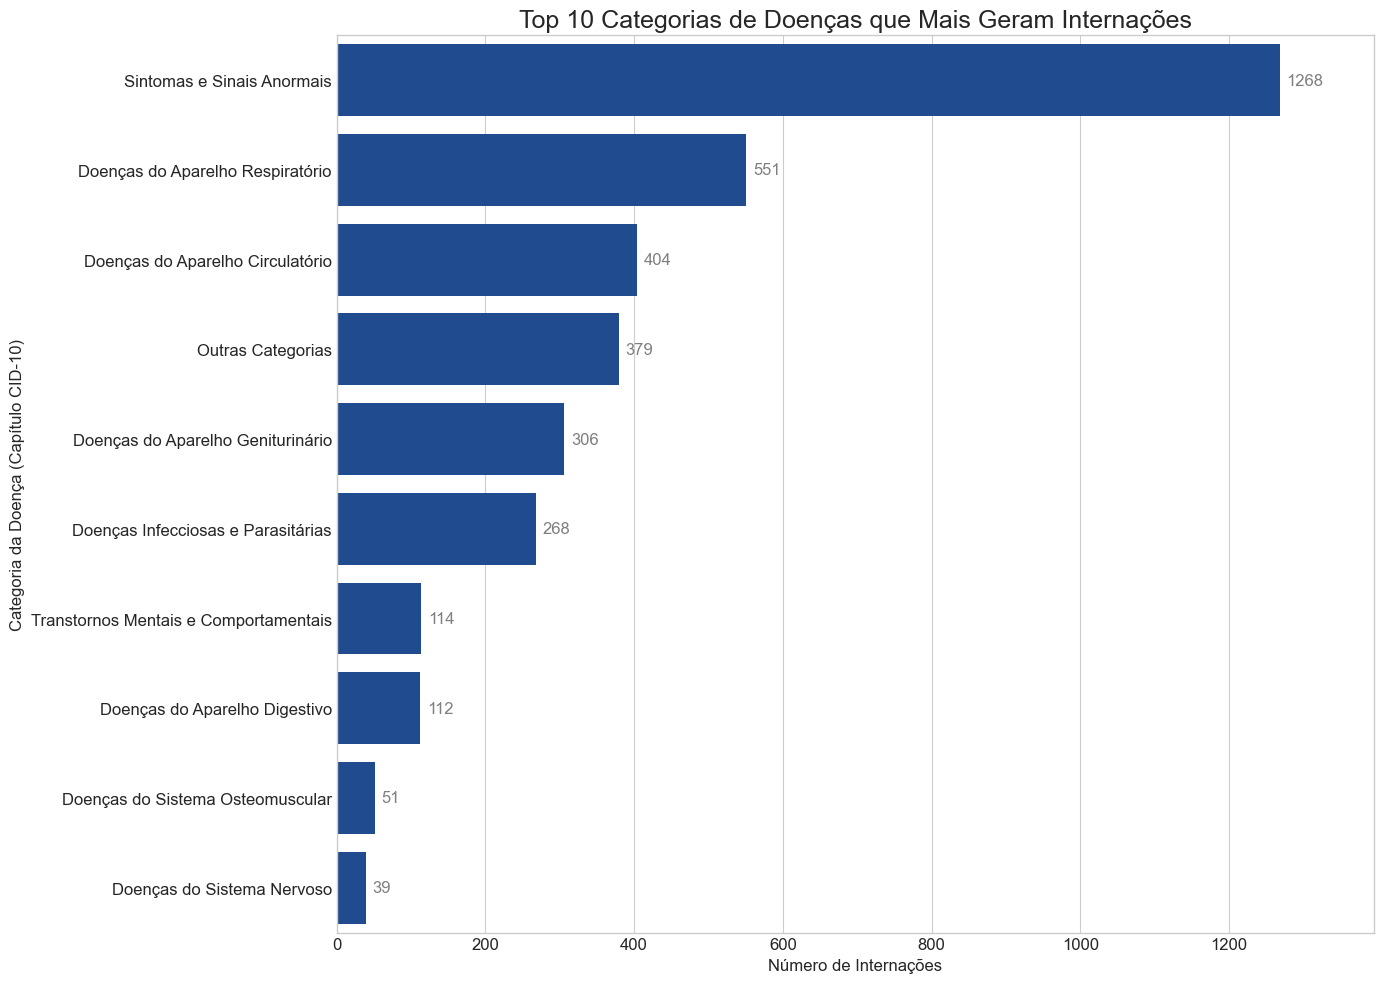

In [35]:
# --- Análise por Categoria de CID (Capítulos do CID-10) ---

# Nesta análise, o foco muda de **volume** para **severidade**. Filtramos o dataset para incluir apenas os atendimentos que resultaram em internação (`internou == 1`)
# e, em seguida, contamos quais são as CATEGORIAS de diagnósticos mais frequentes *dentro deste grupo*.
# Isso nos mostra quais grandes grupos de condições representam a maior carga de trabalho para a rede hospitalar de Curitiba.

# Filtrar o DataFrame para incluir apenas os casos de internação.
df_internacoes_categoria = df_amumc[df_amumc['internou'] == 1].copy()

# Calcular a contagem das 10 categorias de CID mais comuns NESTE GRUPO de internações.
# Usamos 'Nome Categoria CID' pois é a coluna com os nomes legíveis que criamos anteriormente.
top_10_categorias_internacao = df_internacoes_categoria['Nome Categoria CID'].value_counts().nlargest(10)

plt.figure(figsize=(14, 10))

# Adiciona o cálculo da ordem das categorias com base na contagem
ordem_categorias = top_10_categorias_internacao.index

# Passa a ordem calculada para o parâmetro 'order' do barplot
ax = sns.barplot(y=top_10_categorias_internacao.index,
                 x=top_10_categorias_internacao.values,
                 orient='h',
                 order=ordem_categorias) # <--- Adicionado o parâmetro order
ax.bar_label(ax.containers[0], fmt='%.0f', padding=5, fontsize=12, color='gray')

plt.title('Top 10 Categorias de Doenças que Mais Geram Internações', fontsize=18)
plt.xlabel('Número de Internações')
plt.ylabel('Categoria da Doença (Capítulo CID-10)')
plt.xlim(0, top_10_categorias_internacao.max() * 1.1)
plt.tight_layout()

plt.show()

## **Análise por Tipo de Unidade**

Já vimos o perfil geral dos atendimentos, mas será que a demanda se comporta da mesma forma em uma Unidade Básica de Saúde (UBS) e em uma UPA? Entender essa diferença é crucial para a gestão, pois são serviços com propósitos distintos (atenção primária vs. urgência).

### **Volume de Atendimentos por Dia da Semana, Segmentado por Tipo de Unidade**

Vamos revisitar nosso gráfico de atendimentos por dia da semana, mas agora vamos quebrar as barras por `Tipo de Unidade`. Isso nos permitirá comparar diretamente os padrões de demanda de UPAs e Unidades Básicas.

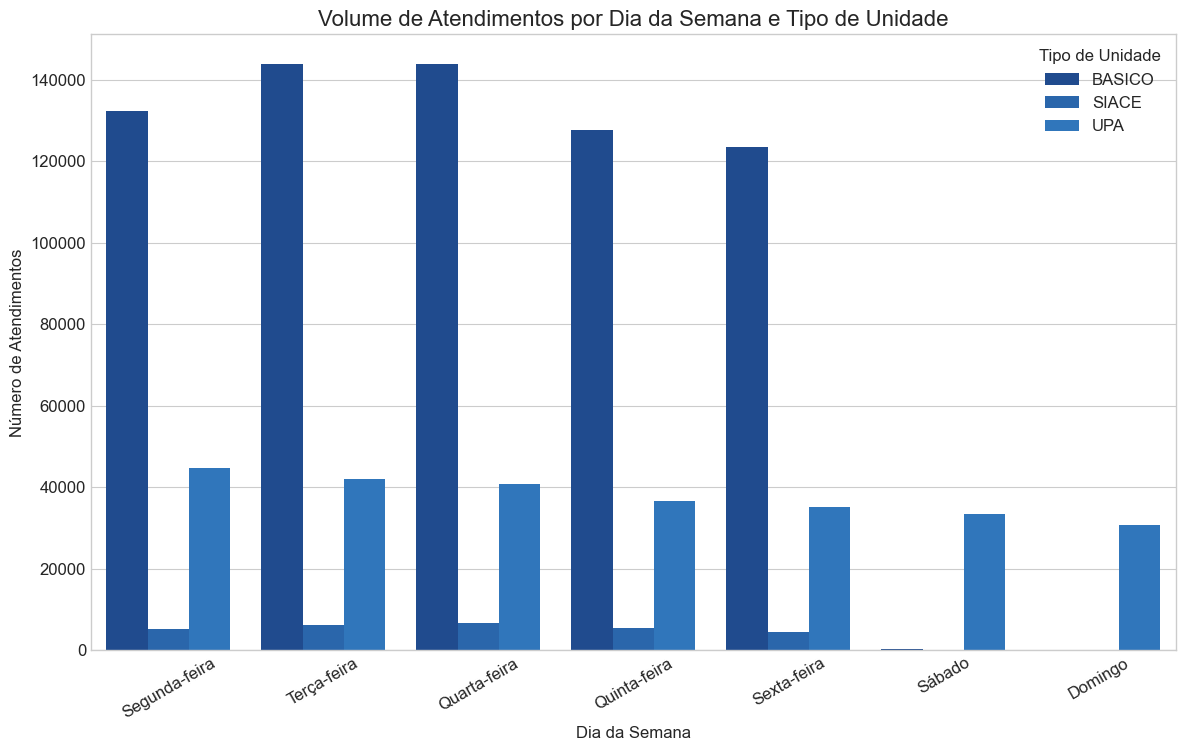

In [36]:
plt.figure(figsize=(14, 8))

dias_da_semana_ordem = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

sns.countplot(
    data=df_amumc,
    x='Dia da Semana Nome',
    hue='Tipo de Unidade',
    order=dias_da_semana_ordem
)

plt.title('Volume de Atendimentos por Dia da Semana e Tipo de Unidade', fontsize=16)
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Atendimentos')
plt.legend(title='Tipo de Unidade')
plt.xticks(rotation=30)

plt.show()

### **Volume de Internações por Dia da Semana, Segmentado por Tipo de Unidade**

Agora, vamos criar um gráfico similar ao anterior, mas focando apenas nos casos que resultaram em internação. Isso nos ajuda a entender se a demanda por leitos hospitalares originada em UPAs e UBS também varia de forma diferente ao longo da semana.

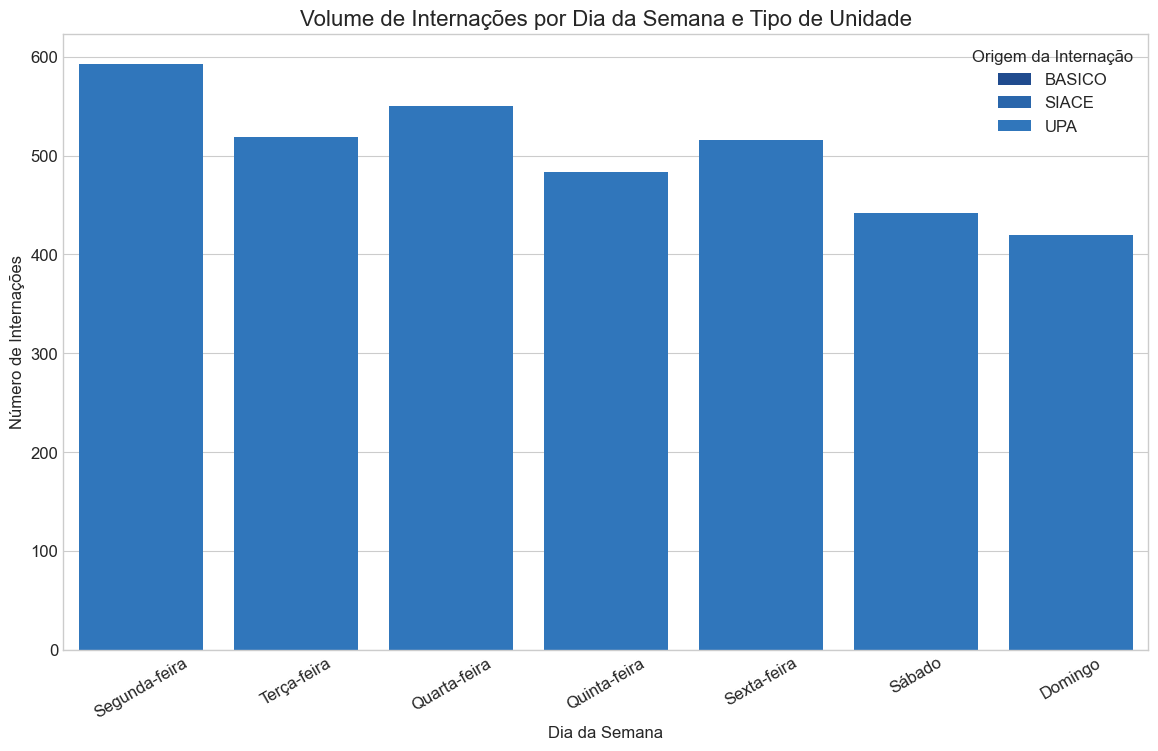

In [37]:
# Primeiro, filtramos o DataFrame para conter apenas os casos que resultaram em internação.
df_internacoes = df_amumc[df_amumc['internou'] == 1].copy()


# Criamos o gráfico de contagem usando este novo DataFrame filtrado.
plt.figure(figsize=(14, 8))

# Ordem correta dos dias para o eixo X
dias_da_semana_ordem = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

sns.countplot(
    data=df_internacoes,
    x='Dia da Semana Nome',
    hue='Tipo de Unidade',
    order=dias_da_semana_ordem
)

# Adicionando títulos e rótulos
plt.title('Volume de Internações por Dia da Semana e Tipo de Unidade', fontsize=16)
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Internações')
plt.legend(title='Origem da Internação')
plt.xticks(rotation=30)

plt.show()

## **Análise de Prescrições e Uso de Medicamentos**

Nesta seção, vamos usar as colunas de quantidade de medicamentos para entender os padrões de tratamento, a demanda da farmácia e os custos associados.

### **Top 15 Diagnósticos (CIDs) por Volume de Medicamentos Prescritos**

Em vez de olhar para a frequência de atendimentos, vamos agora descobrir quais doenças **consomem o maior volume de medicamentos**. Isso ajuda a entender o custo de tratamento para diferentes condições e a planejar o estoque da rede de farmácias.

In [38]:
cid_por_medicamentos = df_amumc.groupby('Descrição do CID')['Qtde Prescrita Farmácia Curitibana'].sum().nlargest(15)

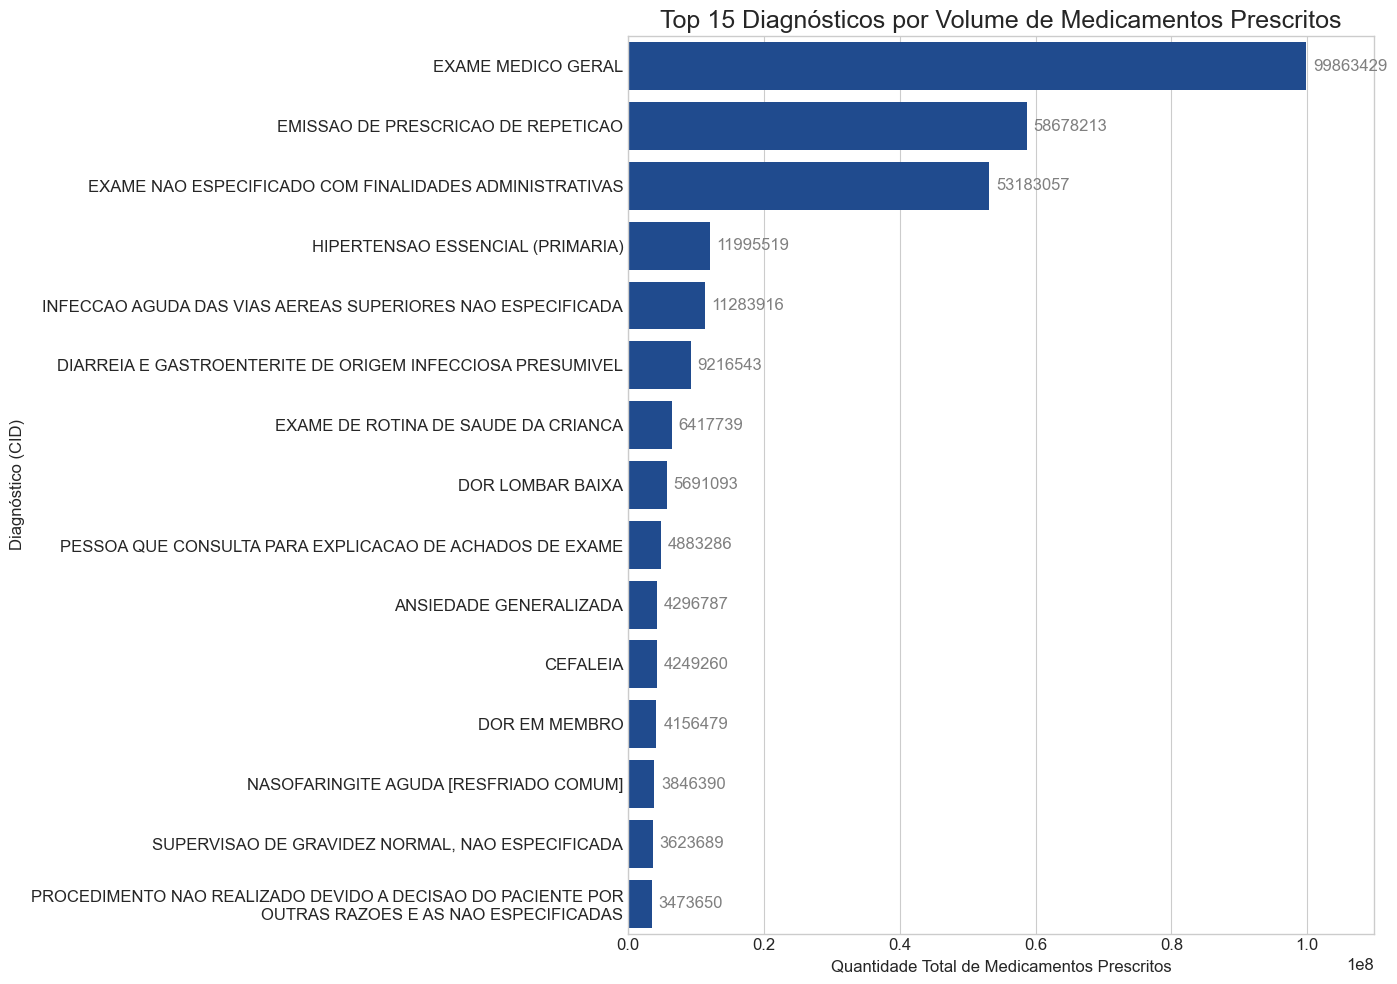

In [39]:
plt.figure(figsize=(14, 10))

ax = sns.barplot(y=rotulos_formatados, x=cid_por_medicamentos.values, orient='h')
ax.bar_label(ax.containers[0], fmt='%.0f', padding=5, fontsize=12, color='gray')

# --- Títulos e Limpeza Visual ---
plt.title('Top 15 Diagnósticos por Volume de Medicamentos Prescritos', fontsize=18)
plt.xlabel('Quantidade Total de Medicamentos Prescritos')
plt.ylabel('Diagnóstico (CID)')
plt.xlim(0, cid_por_medicamentos.max() * 1.1)
plt.tight_layout()

plt.show()

### **Análise de Adesão/Disponibilidade: Medicamentos Prescritos vs. Dispensados**

Vamos comparar o volume total de medicamentos que foram *prescritos* com o volume que foi efetivamente *dispensado* (retirado pelo paciente) na Farmácia Curitibana. Isso nos dá um indicador da "taxa de efetividade" do processo de medicação.

In [40]:
# Passo 1: Calcular os totais de cada coluna. 
# Já garantimos que elas são numéricas nos passos de limpeza.
total_prescrito = df_amumc['Qtde Prescrita Farmácia Curitibana'].sum()
total_dispensado = df_amumc['Qtde Dispensada Farmácia Curitibana'].sum()

In [41]:
# Evita divisão por zero caso não haja prescrições
if total_prescrito > 0:
    taxa_dispensacao = (total_dispensado / total_prescrito) * 100
else:
    taxa_dispensacao = 0

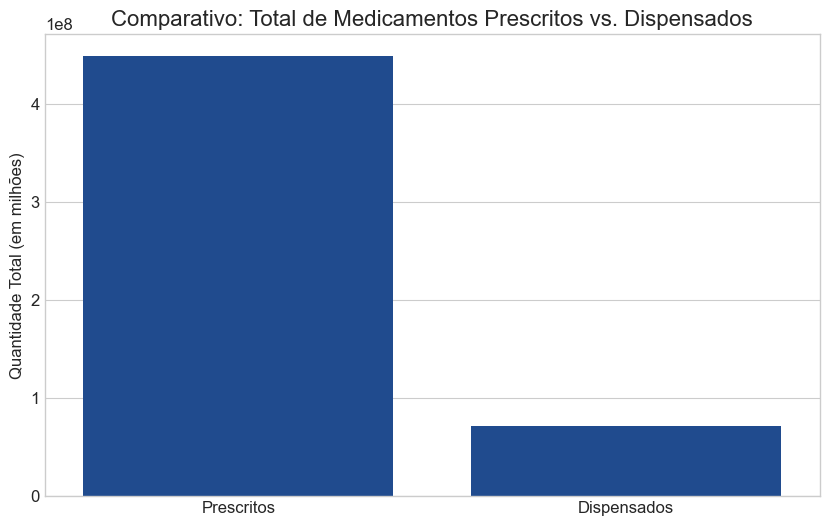

--- Análise de Efetividade da Dispensação de Medicamentos ---
Total de Unidades Prescritas: 448.626.283
Total de Unidades Dispensadas: 71.813.649
Taxa de Dispensação (Dispensados / Prescritos): 16.01%


In [42]:
# Passo 3: Criar um gráfico de barras para comparação visual.
plt.figure(figsize=(10, 6))
sns.barplot(
    x=['Prescritos', 'Dispensados'], 
    y=[total_prescrito, total_dispensado]
)
plt.title('Comparativo: Total de Medicamentos Prescritos vs. Dispensados', fontsize=16)
plt.ylabel('Quantidade Total (em milhões)')
plt.show()

# Passo 2: Exibir os resultados de forma clara.
print("--- Análise de Efetividade da Dispensação de Medicamentos ---")
print(f"Total de Unidades Prescritas: {total_prescrito:,.0f}".replace(',', '.'))
print(f"Total de Unidades Dispensadas: {total_dispensado:,.0f}".replace(',', '.'))
print(f"Taxa de Dispensação (Dispensados / Prescritos): {taxa_dispensacao:.2f}%")

### **Análise de Padronização: Medicamentos do Formulário vs. Não Padronizados**

Esta análise é crucial para a gestão de custos. Medicamentos padronizados (disponíveis no formulário municipal) são geralmente mais baratos e comprados em grande volume. Uma alta quantidade de prescrições de medicamentos não padronizados pode indicar necessidades clínicas específicas ou um ponto de atenção para o orçamento da saúde.

In [43]:
# Calcular os totais de cada coluna.
total_padronizado = df_amumc['Qtde Prescrita Farmácia Curitibana'].sum()
total_nao_padronizado = df_amumc['Qtde de Medicamento Não Padronizado'].sum()

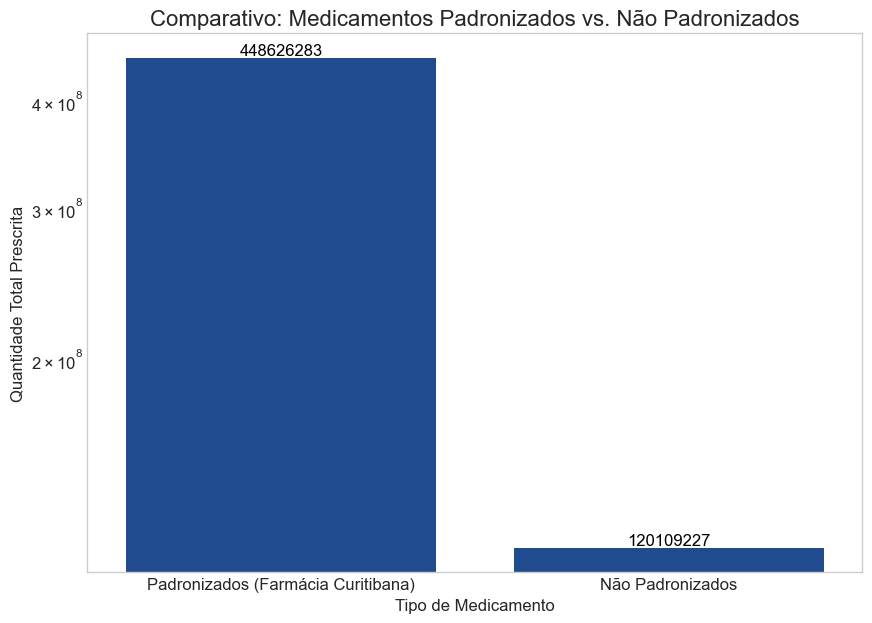

In [44]:
# Criar um gráfico de barras para a comparação visual.
plt.figure(figsize=(10, 7))

# Criamos o gráfico de barras diretamente com os valores calculados
ax = sns.barplot(
    x=['Padronizados (Farmácia Curitibana)', 'Não Padronizados'], 
    y=[total_padronizado, total_nao_padronizado]
)

# Adicionando os rótulos de dados para clareza
ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=12, color='black')

# Adicionando títulos e rótulos
plt.title('Comparativo: Medicamentos Padronizados vs. Não Padronizados', fontsize=16)
plt.ylabel('Quantidade Total Prescrita')
plt.xlabel('Tipo de Medicamento')
# Colocamos o eixo Y em escala logarítmica para vermos a barra menor
plt.yscale('log')

plt.show()

### **Ranking de Unidades de Saúde por Volume de Prescrições**

Esta análise nos ajuda a identificar quais unidades de saúde têm a maior atividade de prescrição. Isso pode estar relacionado ao volume de pacientes da unidade, ao perfil de complexidade dos casos atendidos ou aos protocolos de tratamento de cada local. É um dado importante para a logística farmacêutica.

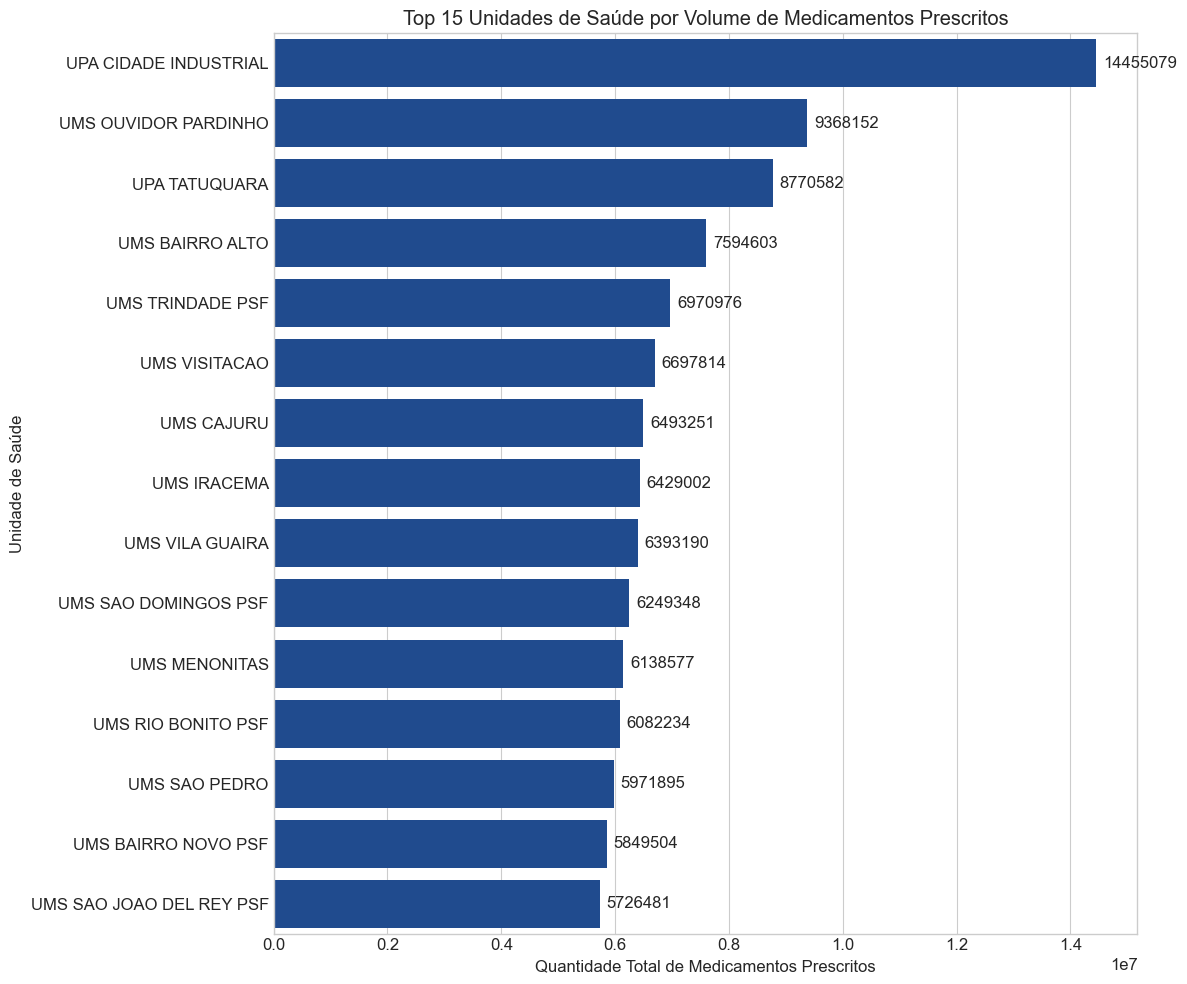

In [45]:
# Calcular o total de medicamentos prescritos por unidade de saúde
top_15_unidades = df_amumc.groupby('Descrição da Unidade')['Qtde Prescrita Farmácia Curitibana'].sum().nlargest(15).reset_index()

# Ordenar do maior para o menor
top_15_unidades = top_15_unidades.sort_values(by='Qtde Prescrita Farmácia Curitibana', ascending=False)

# Definimos uma largura máxima para cada linha do texto
wrap_width = 30
rotulos_formatados_unidades = [textwrap.fill(label, width=wrap_width) for label in top_15_unidades['Descrição da Unidade'].values]

plt.figure(figsize=(12, 10))
ax = sns.barplot(
    data=top_15_unidades,
    x='Qtde Prescrita Farmácia Curitibana',
    # Usamos os rótulos formatados aqui
    y=rotulos_formatados_unidades,
)

# Adicionar rótulos nas barras
ax.bar_label(ax.containers[0], fmt='%.0f', padding=5)

# Títulos
plt.title('Top 15 Unidades de Saúde por Volume de Medicamentos Prescritos')
plt.xlabel('Quantidade Total de Medicamentos Prescritos')
plt.ylabel('Unidade de Saúde') # O rótulo do eixo Y é genérico, as labels são os nomes formatados.

# Ajustar o layout para evitar cortes
plt.tight_layout()
plt.show()

### **Análise de Correlação entre Variáveis Numéricas**

Como etapa final da nossa exploração, vamos criar uma matriz de correlação. Esta visualização nos ajuda a entender rapidamente quais variáveis numéricas se movem juntas (correlação positiva), em direções opostas (correlação negativa) ou se não têm relação linear (próximo de zero). Isso é fundamental para a etapa de seleção de features do nosso modelo.

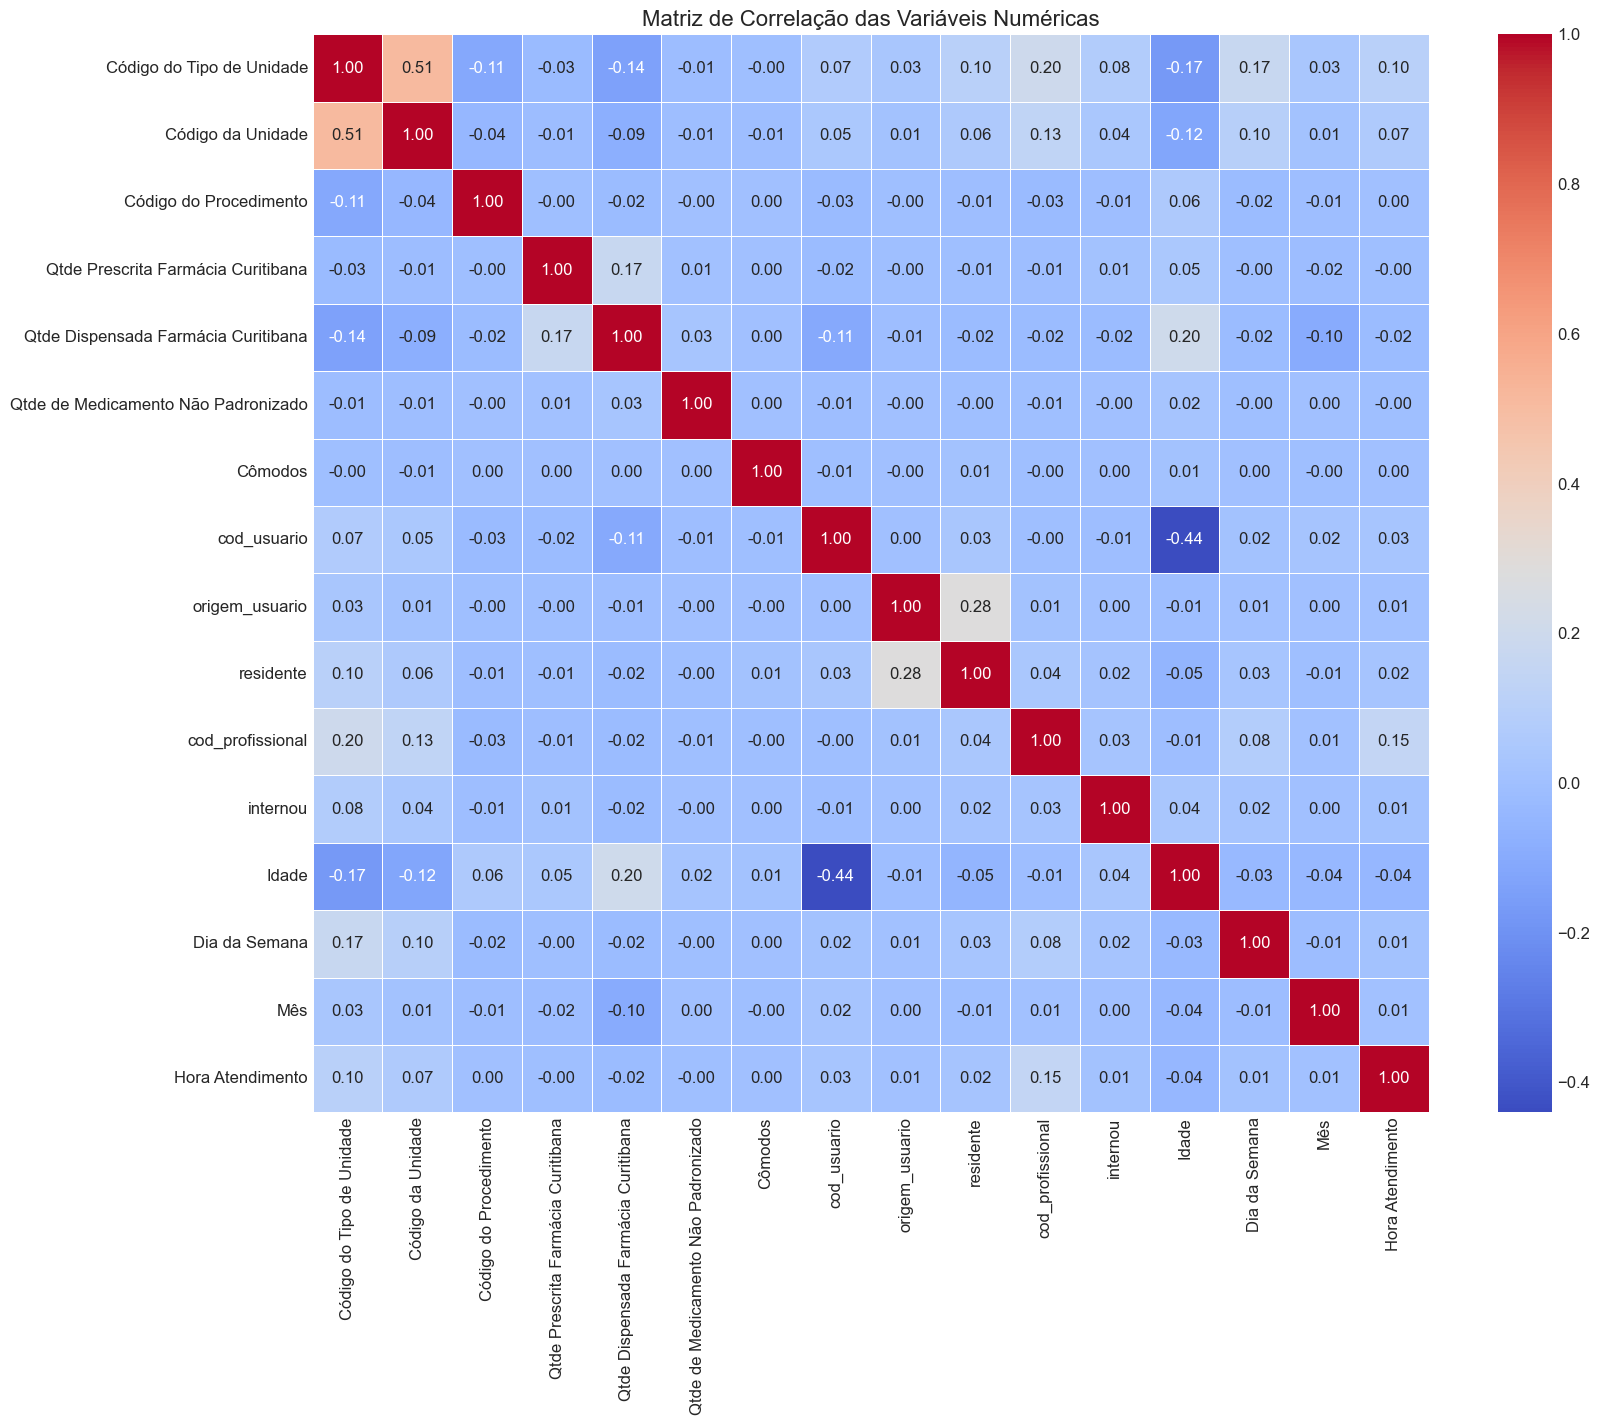

In [46]:
# Selecionamos apenas as colunas numéricas 
df_numeric = df_amumc.select_dtypes(include=np.number)

# Calculamos a matriz de correlação 
corr_matrix = df_numeric.corr()

# Criamos o mapa de calor com os números visíveis
plt.figure(figsize=(18, 14)) 
sns.heatmap(
    corr_matrix, 
    cmap='coolwarm',
    annot=True,    # Ativa a exibição dos números (anotações)
    fmt='.2f',     # Formata os números para ter apenas 2 casas decimais
    linewidths=.5  # Adiciona uma pequena linha entre as células para melhor separação
)

plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()

## **Análise de Padrões de Comportamento e Interações**

Nesta seção, vamos cruzar diferentes variáveis para descobrir padrões de comportamento mais complexos da população ao procurar os serviços de saúde.

#### **Análise de Interações: Padrão Horário vs. Tipo de Dia**

Vamos aprofundar nossa análise temporal. O comportamento de busca por atendimento ao longo das 24 horas de um dia é o mesmo em um dia útil e em um fim de semana? Esta análise nos ajuda a entender os padrões de conveniência e urgência da população.

In [47]:
print("Preparando os dados para a análise horária...")

# Primeiro, garantimos que a coluna 'Data do Atendimento' está no formato datetime
agrupador_data = df_amumc['Data do Atendimento'].dt.date.rename('Data')
agrupador_hora = df_amumc['Data do Atendimento'].dt.hour.rename('Hora')

# Agora o groupby usa os nomes corretos, evitando a colisão de nomes
df_horario = df_amumc.groupby(
    [agrupador_data, agrupador_hora]
).size().reset_index(name='Total_Atendimentos')


# Adicionamos a informação de Fim de Semana
# (a coluna 'Data' já vem com o nome correto, então só precisamos converter para datetime)
df_horario['Data'] = pd.to_datetime(df_horario['Data'])
df_horario['Dia da Semana'] = df_horario['Data'].dt.dayofweek
df_horario['Fim de Semana'] = df_horario['Dia da Semana'].isin([5, 6])


print("Dados preparados com sucesso. Amostra:")
display(df_horario.head())

Preparando os dados para a análise horária...
Dados preparados com sucesso. Amostra:


,Data,Hora,Total_Atendimentos,Dia da Semana,Fim de Semana
0,2025-02-01,0,35,5,True
1,2025-02-01,1,36,5,True
2,2025-02-01,2,41,5,True
3,2025-02-01,3,26,5,True
4,2025-02-01,4,32,5,True


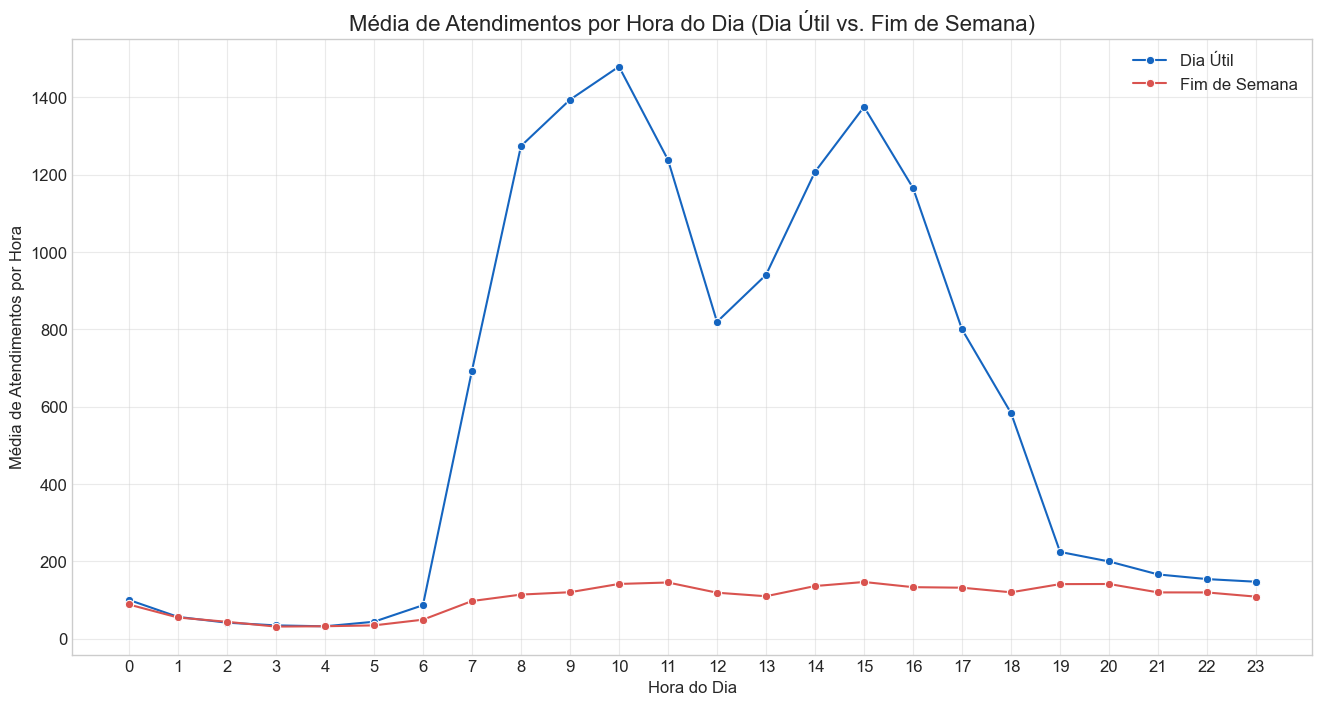

In [48]:
plt.figure(figsize=(16, 8))

sns.lineplot(
    x='Hora', 
    y='Total_Atendimentos', 
    hue='Fim de Semana',
    data=df_horario, 
    errorbar=None,
    marker='o',
    palette={False: PALETA_CORES_PROJETO[1], True: '#d9534f'}
)

plt.title('Média de Atendimentos por Hora do Dia (Dia Útil vs. Fim de Semana)', fontsize=16)
plt.xlabel('Hora do Dia')
plt.ylabel('Média de Atendimentos por Hora')
plt.legend(title='', labels=['Dia Útil', 'Fim de Semana'])
plt.xticks(ticks=range(0, 24))
plt.grid(True, alpha=0.4)

plt.show()


### **Interação: Perfil Clínico por Tipo de Unidade**

Será que as queixas de saúde que chegam às UPAs são as mesmas que chegam às Unidades Básicas? Vamos analisar as categorias de diagnóstico (CID) mais comuns em cada tipo de serviço para entender suas vocações e demandas específicas.

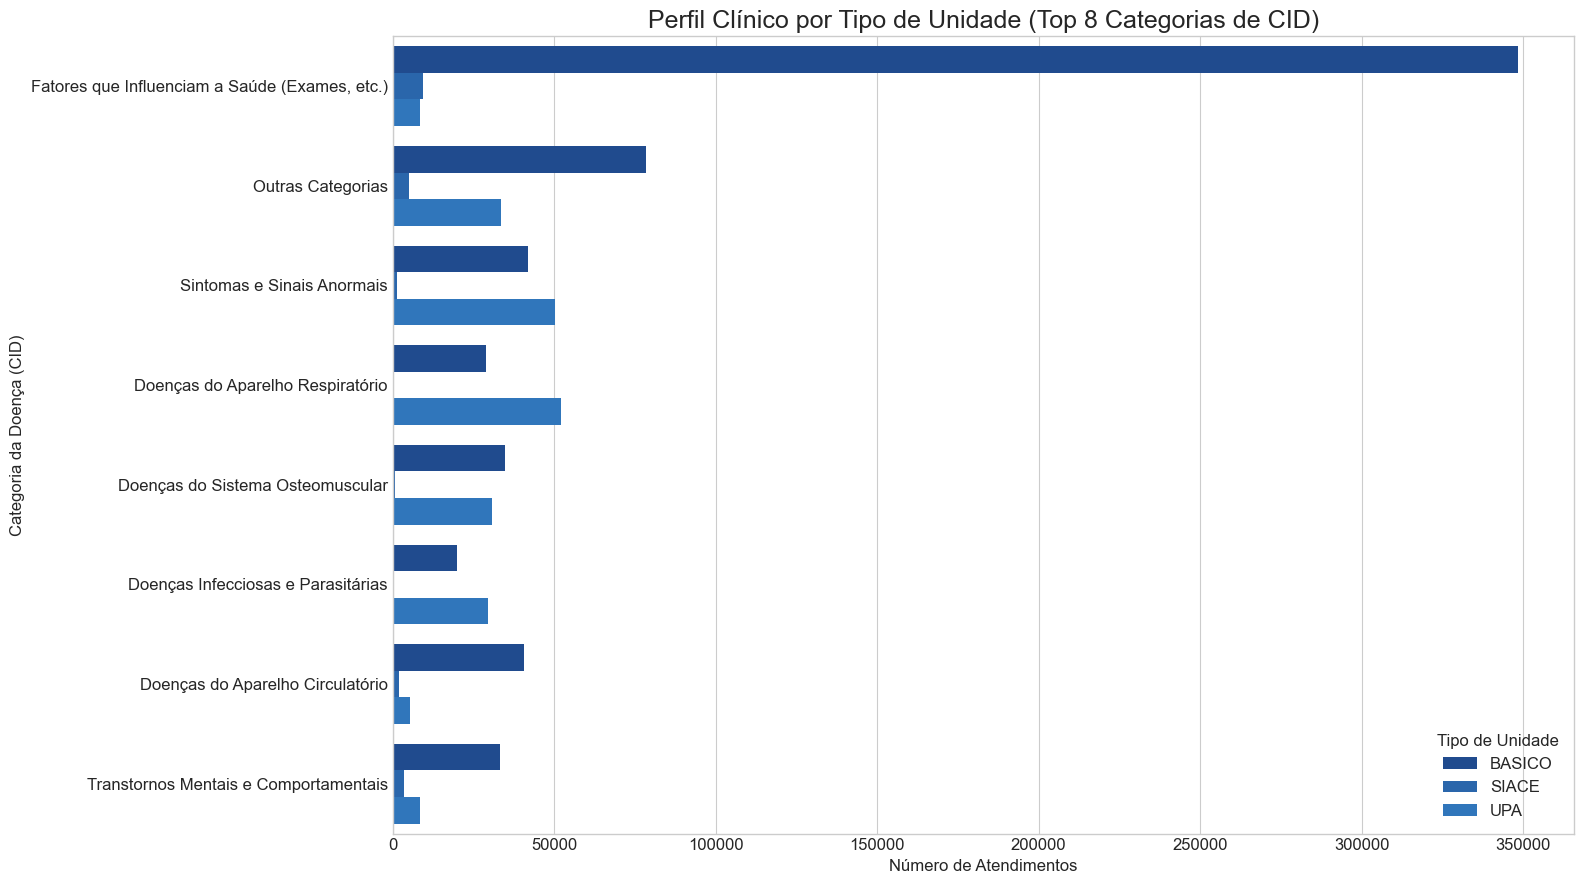

In [49]:
# Pegamos as 8 categorias de CID mais comuns para manter o gráfico legível
top_8_categorias_cid = df_amumc['Nome Categoria CID'].value_counts().nlargest(8).index

# Filtramos o DataFrame para incluir apenas essas categorias principais
df_filtrado_cid = df_amumc[df_amumc['Nome Categoria CID'].isin(top_8_categorias_cid)]

# --- CRIAÇÃO DO GRÁFICO ---
plt.figure(figsize=(16, 9))

# O countplot com o 'hue' vai criar barras lado a lado para UPA e BASICO para cada categoria de CID
sns.countplot(
    data=df_filtrado_cid,
    y='Nome Categoria CID', # Usamos o eixo Y para melhor legibilidade
    hue='Tipo de Unidade',
    order=top_8_categorias_cid
)

plt.title('Perfil Clínico por Tipo de Unidade (Top 8 Categorias de CID)', fontsize=18)
plt.xlabel('Número de Atendimentos')
plt.ylabel('Categoria da Doença (CID)')
plt.legend(title='Tipo de Unidade')
plt.tight_layout()

plt.show()

### **Interação: Perfil Demográfico por Bairro**

Vamos investigar se a distribuição de idade dos pacientes é a mesma nos bairros de maior demanda ou se existem "bairros jovens" e "bairros de idosos". Usaremos um gráfico `boxplot` para comparar a distribuição de idades nos 5 bairros com mais atendimentos.

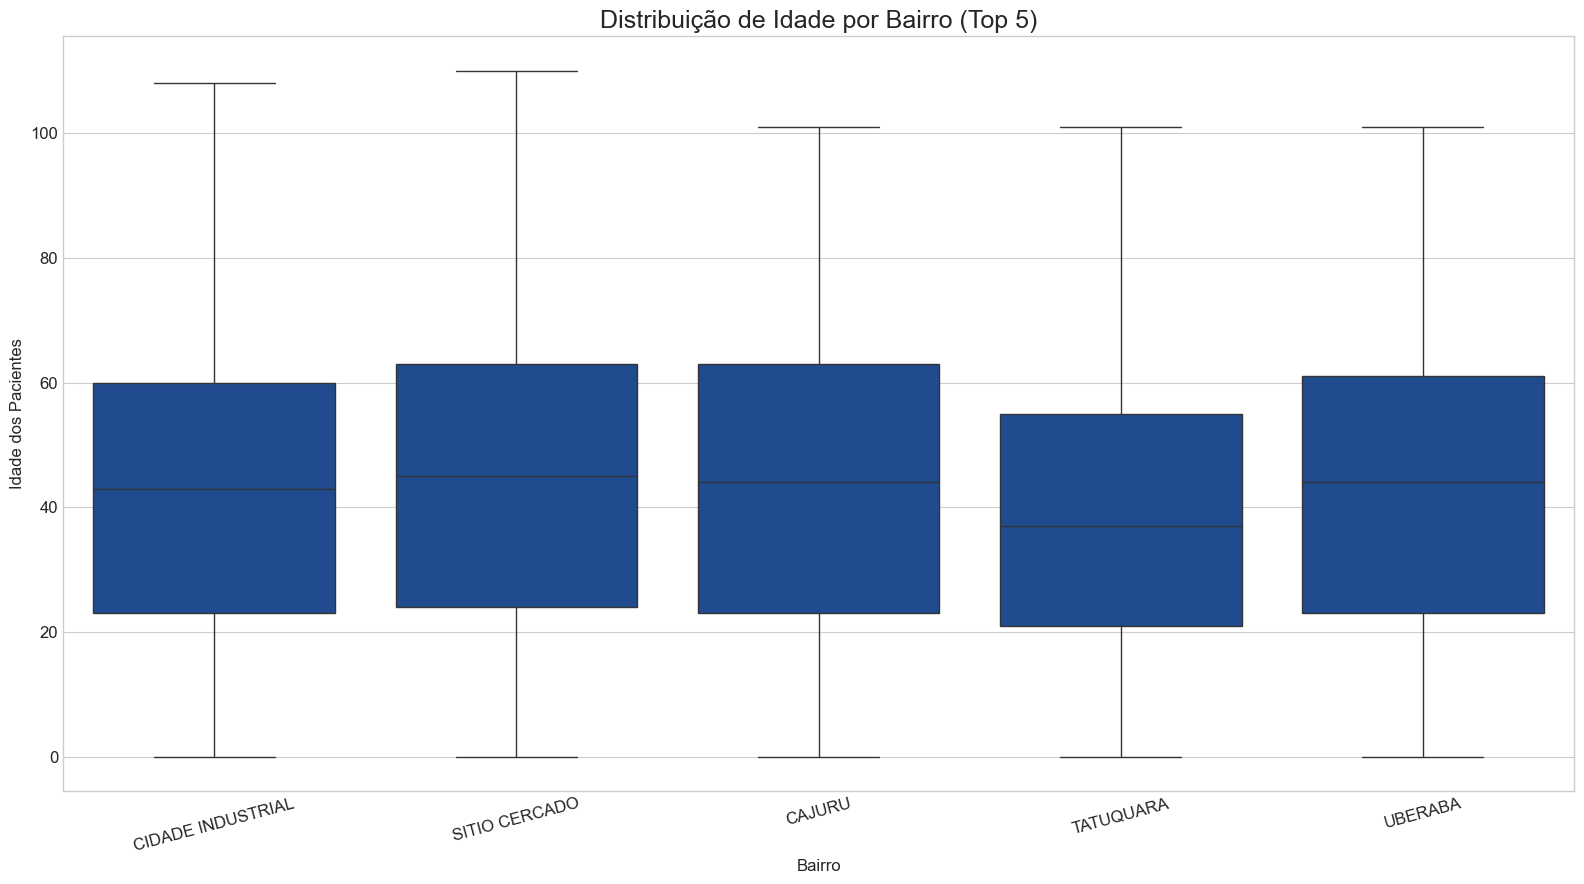

In [51]:
# Descobrir quais são os 5 bairros com mais atendimentos
top_5_bairros = df_amumc['Bairro'].value_counts().nlargest(5).index

# Filtrar o DataFrame para conter apenas os dados desses 5 bairros
df_top_bairros = df_amumc[df_amumc['Bairro'].isin(top_5_bairros)]

# --- CRIAÇÃO DO GRÁFICO ---
plt.figure(figsize=(16, 9))

# O boxplot é excelente para comparar a distribuição de uma variável numérica (Idade)
# entre diferentes categorias (Bairro).
sns.boxplot(
    data=df_top_bairros,
    x='Bairro',
    y='Idade',
    order=top_5_bairros # Garante que os bairros apareçam em ordem de volume
)

plt.title('Distribuição de Idade por Bairro (Top 5)', fontsize=18)
plt.xlabel('Bairro')
plt.ylabel('Idade dos Pacientes')
plt.xticks(rotation=15) # Rotaciona levemente para não sobrepor
plt.tight_layout()

plt.show()

### **Interação: Determinantes Sociais vs. Causa da Internação**

Já temos a hipótese de que as condições de moradia podem influenciar a saúde. Mas será que o *motivo* da internação também muda? Vamos investigar se certos tipos de habitação estão associados a categorias específicas de doenças graves.

In [52]:
# Filtrar apenas os casos de internação (sem alteração)
df_internacoes = df_amumc[df_amumc['internou'] == 1].copy()

# Selecionar os 4 tipos de habitação mais comuns (sem alteração)
top_4_habitacoes = df_internacoes['Tipo de Habitação'].value_counts().nlargest(4).index
df_filtrado_habitacao = df_internacoes[df_internacoes['Tipo de Habitação'].isin(top_4_habitacoes)]

# Criar a tabela de cruzamento normalizada (sem alteração)
tabela_cruzada_hab_cid = pd.crosstab(
    df_filtrado_habitacao['Tipo de Habitação'],
    df_filtrado_habitacao['Nome Categoria CID'],
    normalize='index'
) * 100

# Selecionamos as 6 categorias de CID mais relevantes para a visualização (sem alteração)
top_6_cid_cats = df_internacoes['Nome Categoria CID'].value_counts().nlargest(6).index
tabela_cruzada_hab_cid = tabela_cruzada_hab_cid[top_6_cid_cats]


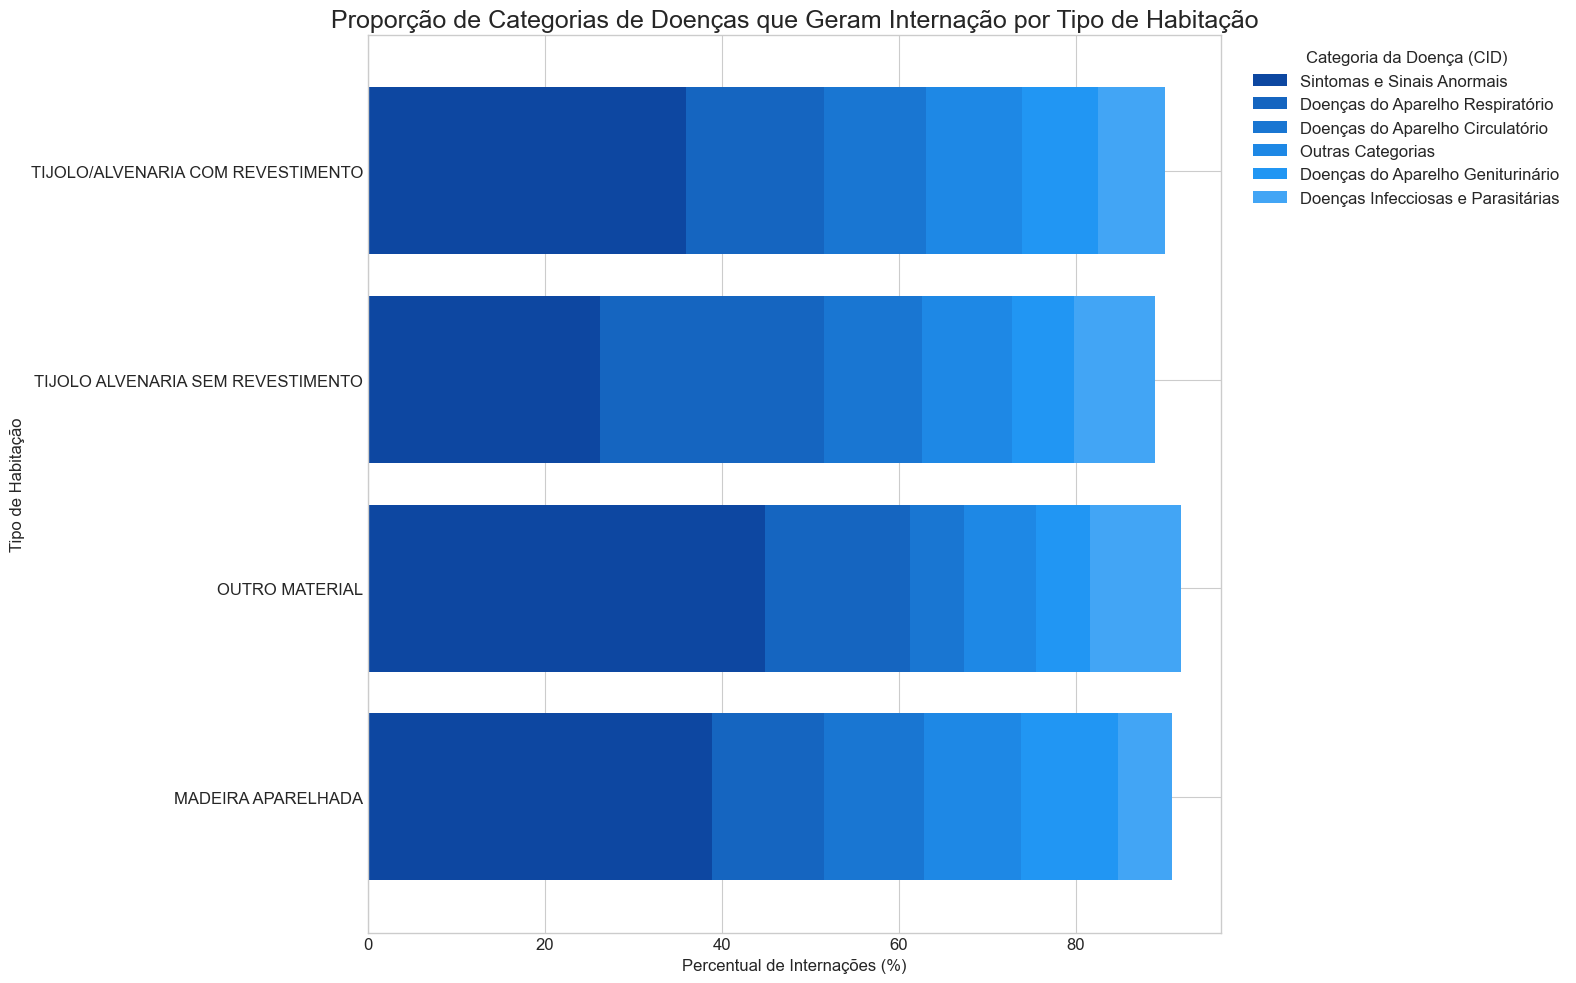

In [53]:
ax = tabela_cruzada_hab_cid.plot(
    kind='barh', # <--- MUDANÇA PRINCIPAL AQUI
    stacked=True, 
    figsize=(16, 10),
    width=0.8 # Deixa as barras um pouco mais "grossas"
)

# --- Ajustes nos títulos e rótulos para o novo formato ---
plt.title('Proporção de Categorias de Doenças que Geram Internação por Tipo de Habitação', fontsize=18)
plt.xlabel('Percentual de Internações (%)') # O eixo X agora é o percentual
plt.ylabel('Tipo de Habitação')         # O eixo Y agora é a categoria
plt.legend(title='Categoria da Doença (CID)', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

### **Interação: Perfil Clínico por Tipo de Dia (Dia Útil vs. Fim de Semana)**

A demanda nos fins de semana é diferente, mas será que o *tipo* de problema de saúde também muda? Nossa hipótese é que os fins de semana concentram mais casos agudos (como lesões), enquanto os dias úteis têm mais casos de rotina e acompanhamento. Vamos verificar isso analisando a proporção de cada categoria de CID.

In [54]:
# Passo 1: Selecionar as 8 categorias de CID mais comuns para manter o gráfico legível
top_8_categorias_cid = df_amumc['Nome Categoria CID'].value_counts().nlargest(8).index
df_filtrado_cid_fds = df_amumc[df_amumc['Nome Categoria CID'].isin(top_8_categorias_cid)]

# Passo 2: Criar uma tabela de cruzamento e normalizar por linha para obter as proporções (%)
# Isso nos dirá, para 'Dia Útil' e 'Fim de Semana', qual a porcentagem de cada categoria de CID.
tabela_cruzada_fds_cid = pd.crosstab(
    df_filtrado_cid_fds['Fim de Semana'],
    df_filtrado_cid_fds['Nome Categoria CID'],
    normalize='index'
) * 100

# Renomeando o índice para clareza no gráfico
tabela_cruzada_fds_cid.index = tabela_cruzada_fds_cid.index.map({False: 'Dias Úteis', True: 'Fim de Semana'})

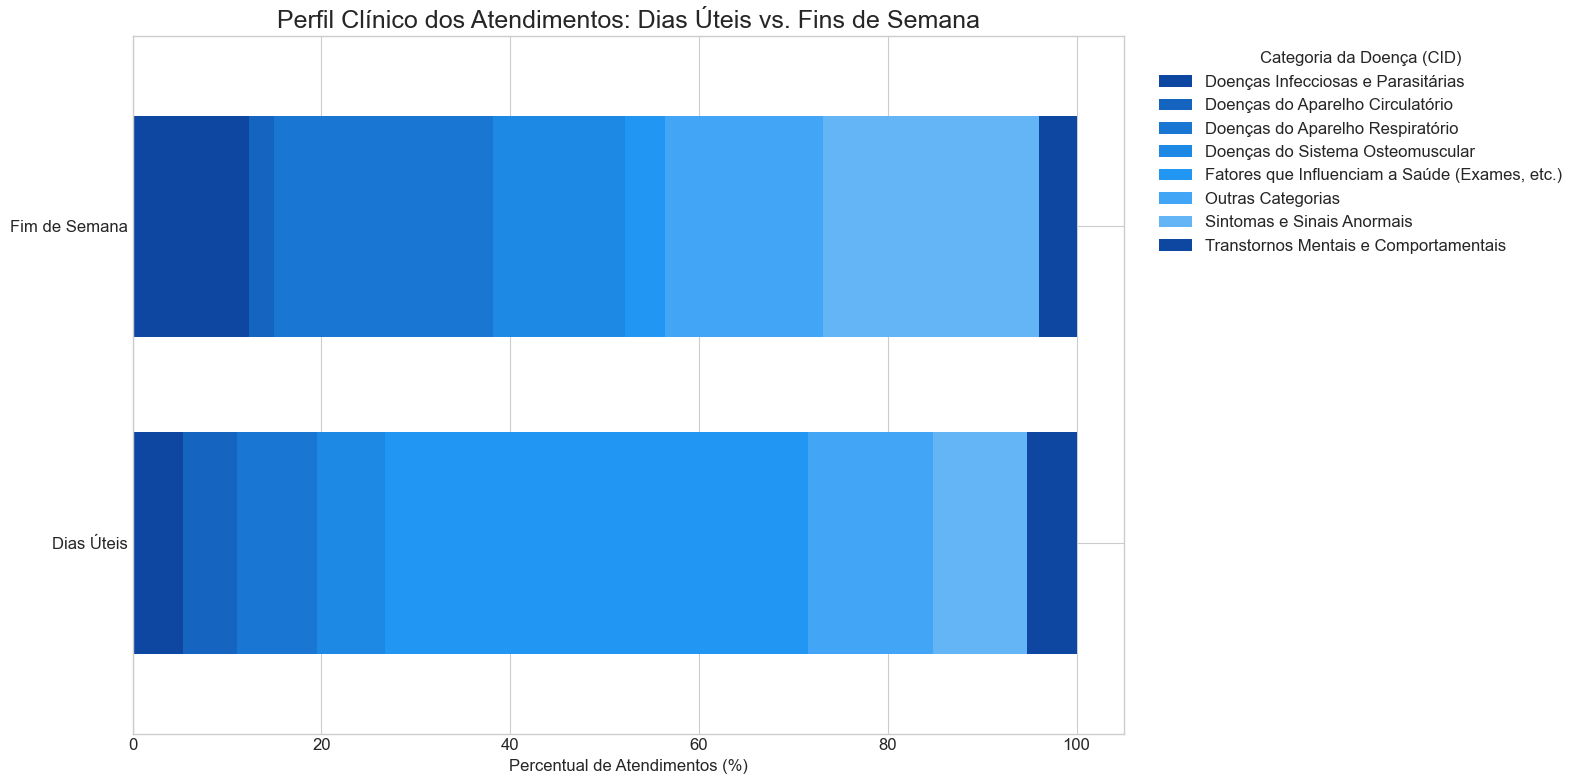

In [55]:
# Usamos um gráfico de barras empilhadas horizontais
ax = tabela_cruzada_fds_cid.plot(
    kind='barh', 
    stacked=True, 
    figsize=(16, 8),
    width=0.7
)

# --- Títulos e Rótulos ---
plt.title('Perfil Clínico dos Atendimentos: Dias Úteis vs. Fins de Semana', fontsize=18)
plt.xlabel('Percentual de Atendimentos (%)')
plt.ylabel('')
plt.legend(title='Categoria da Doença (CID)', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

### **Análise de Interação: Heatmap de Média de Atendimentos por Hora e Dia da Semana**

Para finalizar nossa análise de interações, vamos criar um mapa de calor. Esta visualização nos permitirá identificar os "horários de pico" para cada dia da semana de forma muito rápida. As cores mais "quentes" indicarão os períodos de maior demanda, nos dando um panorama completo do fluxo de pacientes.

In [56]:
# PREPARAÇÃO DOS DADOS (sem alteração)
agrupador_data = df_amumc['Data do Atendimento'].dt.date.rename('Data')
agrupador_hora = df_amumc['Data do Atendimento'].dt.hour.rename('Hora')
df_horario = df_amumc.groupby([agrupador_data, agrupador_hora]).size().reset_index(name='Total_Atendimentos')
df_horario['Data'] = pd.to_datetime(df_horario['Data'])
df_horario['Dia da Semana'] = df_horario['Data'].dt.dayofweek
mapa_dias = {
    0: 'Segunda-feira', 1: 'Terça-feira', 2: 'Quarta-feira',
    3: 'Quinta-feira', 4: 'Sexta-feira', 5: 'Sábado', 6: 'Domingo'
}
df_horario['Dia da Semana Nome'] = df_horario['Dia da Semana'].map(mapa_dias)


# CRIAÇÃO DA MATRIZ
heatmap_data = df_horario.groupby(['Dia da Semana Nome', 'Hora'])['Total_Atendimentos'].mean().unstack()

# Definimos a lista de ordem DENTRO da célula para garantir que ela sempre exista.
DIAS_DA_SEMANA_ORDEM = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']

# Garantimos a ordem correta das linhas
heatmap_data = heatmap_data.reindex(DIAS_DA_SEMANA_ORDEM)

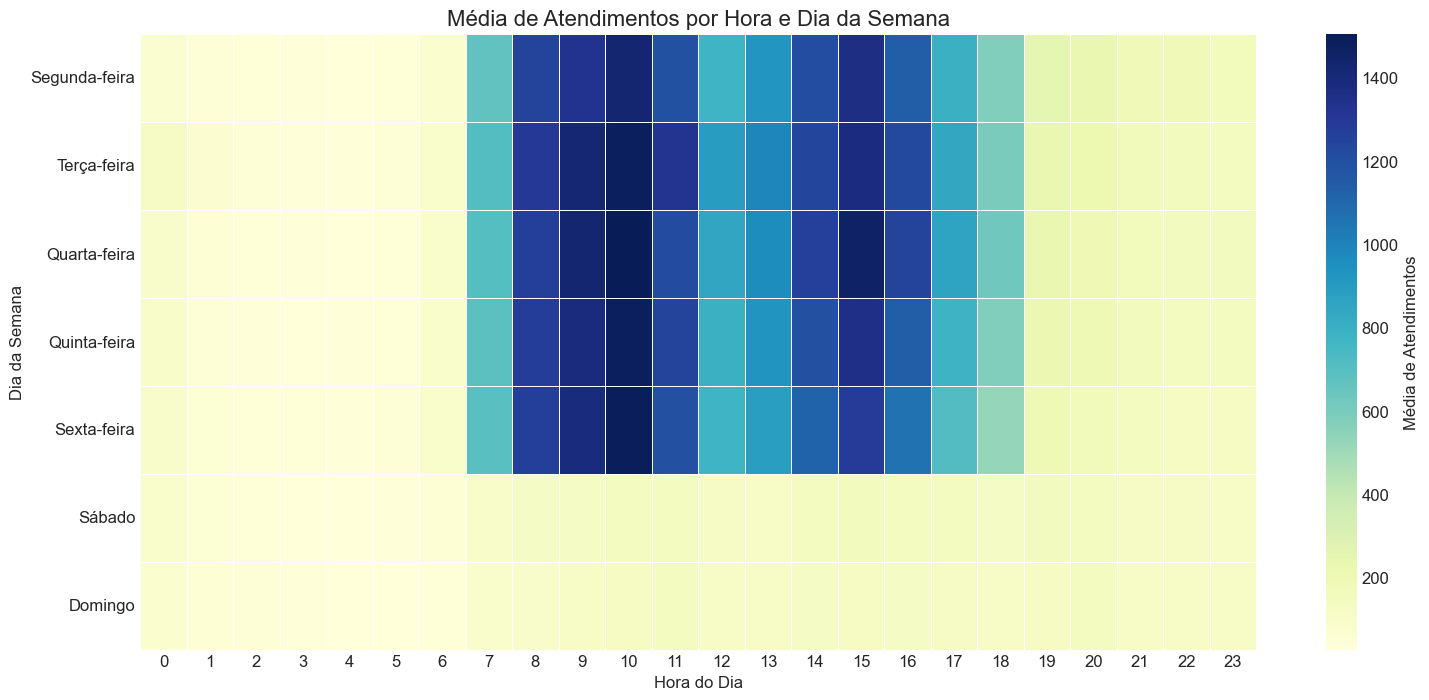

In [57]:

plt.figure(figsize=(18, 8))
sns.heatmap(
    heatmap_data, 
    cmap='YlGnBu',
    annot=False,
    linewidths=.5,
    cbar_kws={'label': 'Média de Atendimentos'}
)
plt.title('Média de Atendimentos por Hora e Dia da Semana', fontsize=16)
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')

plt.show()

# _**Conclusão Geral do Projeto de Análise Exploratória**_

Este notebook apresentou uma jornada completa através de um vasto conjunto de dados de atendimentos de saúde de Curitiba, referente ao primeiro semestre de 2025. Partindo de mais de 1.2 milhão de registros brutos, foi realizado um processo minucioso de limpeza, validação e enriquecimento de dados, resultando em um dataset final de alta qualidade com 962.794 observações.

A subsequente Análise Exploratória de Dados (EDA) transformou esses dados em inteligência acionável, revelando o funcionamento, as pressões e os padrões do sistema de saúde da cidade.

### _**Principais Insights Extraídos dos Gráficos e Estatísticas:**_

* **O Sistema de Saúde Opera em Duas Frentes Claras:** A análise estatística mostrou que a maioria dos atendimentos (671.406) ocorre em unidades do tipo **"BASICO"**. Os gráficos de análise clínica confirmam isso, mostrando que o procedimento mais comum é a **"CONSULTA MEDICA EM ATENCAO PRIMARIA"**. Em contrapartida, a análise de internações provou que **100% dos casos graves** que levaram à hospitalização se originaram nas **UPAs**. Isso pinta um quadro claro de um sistema com uma forte base de atenção primária para o volume do dia a dia e uma rede de urgência altamente especializada para os casos de maior severidade.

* **O Perfil do Usuário é Bem Definido:** Os gráficos demográficos revelaram que o perfil predominante do paciente é **feminino (63%)** e **adulto**. No entanto, o histograma de idades mostrou um pico muito significativo na faixa de **0 anos**, destacando a importância da saúde neonatal e pediátrica como um dos principais focos de demanda do sistema.

* **A Demanda Possui um Ritmo Previsível:** A análise temporal, especialmente o heatmap, nos deu um mapa claro da demanda. Os horários de pico de atendimento se concentram nos dias úteis, entre **10h e 11h da manhã e 14h e 16h da tarde**. A análise de interação mostrou que, enquanto a demanda nas UBS despenca nos fins de semana, a demanda nas UPAs permanece mais constante, confirmando seu papel como o principal serviço de saúde disponível nesses períodos.

* **Evidências de Determinantes Sociais na Saúde:** A análise de interação revelou uma **conexão baseada em dados entre as condições de moradia e os tipos de doenças** que levam à internação, sugerindo que investimentos em infraestrutura social podem ser uma política de saúde preventiva eficaz.

* **Dinâmica Geográfica Regional:** A análise geográfica confirmou que, embora a maioria dos atendimentos seja de residentes de Curitiba, a cidade funciona como um **polo de saúde para a Região Metropolitana**, absorvendo um volume considerável de cidades vizinhas. Dentro da cidade, bairros mais populosos como Cidade Industrial e Sítio Cercado lideram a procura por serviços.

Em suma, este notebook transformou um volume massivo de dados brutos em um painel estratégico de inteligência em saúde. Cada gráfico e tabela construídos na fase de exploração não apenas respondeu a uma pergunta, mas também ajudou a pintar um quadro completo do ecossistema de saúde de Curitiba. A profundidade desta Análise Exploratória de Dados construiu uma fundação sólida e confiável, ideal para a próxima e mais avançada fase: a **construção de modelos preditivos** precisos e informados.

## **_Agradecimentos e Fonte dos Dados_**

Gostaria de expressar meu sincero agradecimento à **Prefeitura Municipal de Curitiba** e à **Secretaria Municipal da Saúde (SMS)** pela iniciativa de manter o portal de **Dados Abertos de Curitiba**. A disponibilização de dados públicos de alta qualidade é um pilar fundamental para a transparência, a inovação e o desenvolvimento de análises como esta, que visam gerar insights para a melhoria dos serviços públicos.

### **_Sobre o Dataset_**

O conjunto de dados utilizado neste notebook foi extraído do sistema informatizado **"E-saúde"**. Este sistema é responsável por registrar todos os atendimentos realizados na vasta rede de atenção da Secretaria Municipal de Saúde, que inclui Unidades Básicas de Saúde (UBS), Unidades de Pronto Atendimento (UPAs), Centros de Especialidades Médicas e Odontológicas, entre outros. Os dados aqui analisados referem-se ao perfil de atendimento dos profissionais médicos da rede.

O dataset pode ser acessado publicamente através do seguinte link:

* [**Dataset: Atendimento Médico - E-Saúde**](https://dadosabertos.curitiba.pr.gov.br/conjuntodado/detalhe?chave=05954644-5595-4dcb-b961-1e31e22a1c6e)

### _**Metadados**_

Abaixo estão os metadados relevantes do conjunto de dados no momento da análise:

* **Última atualização:** 06/06/2025
* **Secretaria Responsável:** SMS
* **Responsável Técnico:** _Beatriz Battistella Nadas_
* **Frequência de atualização:** Mensal
* **Espectro temporal:** Últimos 3 meses